https://www.kaggle.com/competitions/sf-dst-car-price-prediction

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
plt.style.use("dark_background")

# Загрузка данных

In [ ]:
# sample_submission
! gdown --id 1oB-4xcbojirk3Wx-qV-0S6hXDVPpV59k

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1oB-4xcbojirk3Wx-qV-0S6hXDVPpV59k
To: /content/all_auto_ru_09_09_2020.csv
100% 349M/349M [00:01<00:00, 177MB/s]


In [ ]:
# Не получается скачать треин с gdrive, хотя доступ по ссылке предоставил 
!gdown --id 1k09R7u5rslz6ih3olxP6kG8KcUozJ6xV

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1k09R7u5rslz6ih3olxP6kG8KcUozJ6xV
To: /content/new_test.csv
100% 121M/121M [00:00<00:00, 182MB/s] 


In [ ]:
! gdown --id 1oB-4xcbojirk3Wx-qV-0S6hXDVPpV59k

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1oB-4xcbojirk3Wx-qV-0S6hXDVPpV59k
To: /content/all_auto_ru_09_09_2020.csv
100% 349M/349M [00:01<00:00, 184MB/s]


In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Dataset/Auto_ru/test.csv')

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Dataset/Auto_ru/all_auto_ru_09_09_2020.csv')

In [ ]:
sub = pd.read_csv('/content/drive/MyDrive/Dataset/Auto_ru/sample_submission.csv')

In [ ]:
train.head(2)

,bodyType,brand,color,fuelType,modelDate,name,numberOfDoors,productionDate,vehicleConfiguration,vehicleTransmission,...,Руль,Состояние,Владельцы,ПТС,Таможня,Владение,price,start_date,hidden,model
0,Седан,AUDI,040001,бензин,1990.0,2.8 MT (174 л.с.) 4WD,4.0,1991,SEDAN MECHANICAL 2.8,MECHANICAL,...,LEFT,NaN,3.0,ORIGINAL,True,NaN,200000.0,2019-10-03T08:09:11Z,NaN,100
1,Седан,AUDI,EE1D19,бензин,1982.0,1.8 MT (90 л.с.),4.0,1986,SEDAN MECHANICAL 1.8,MECHANICAL,...,LEFT,NaN,3.0,ORIGINAL,True,NaN,60000.0,2020-09-06T06:49:40Z,NaN,100


In [ ]:
test.head(2)

,bodyType,brand,car_url,color,complectation_dict,description,engineDisplacement,enginePower,equipment_dict,fuelType,...,vehicleConfiguration,vehicleTransmission,vendor,Владельцы,Владение,ПТС,Привод,Руль,Состояние,Таможня
0,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,синий,NaN,"Все автомобили, представленные в продаже, прох...",1.2 LTR,105 N12,"{""engine-proof"":true,""tinted-glass"":true,""airb...",бензин,...,LIFTBACK ROBOT 1.2,роботизированная,EUROPEAN,3 или более,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
1,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,чёрный,NaN,ЛОТ: 01217195\nАвтопрага Север\nДанный автомоб...,1.6 LTR,110 N12,"{""cruise-control"":true,""asr"":true,""esp"":true,""...",бензин,...,LIFTBACK MECHANICAL 1.6,механическая,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен


In [ ]:
sub.head(2)

,sell_id,price
0,1100575026,0
1,1100549428,0


## Знакомство с данными

 У нас есть 2 датафрейма, первый собранный в рамках исследования df будет испольован для построения модели и второй, включающий в себя внутренние данные компании - для оценки модели на кагл.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89378 entries, 0 to 89377
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bodyType              89377 non-null  object 
 1   brand                 89378 non-null  object 
 2   color                 89378 non-null  object 
 3   fuelType              89378 non-null  object 
 4   modelDate             89377 non-null  float64
 5   name                  89377 non-null  object 
 6   numberOfDoors         89377 non-null  float64
 7   productionDate        89378 non-null  int64  
 8   vehicleConfiguration  89377 non-null  object 
 9   vehicleTransmission   89377 non-null  object 
 10  engineDisplacement    89377 non-null  object 
 11  enginePower           89377 non-null  float64
 12  description           86124 non-null  object 
 13  mileage               89378 non-null  int64  
 14  Комплектация          89378 non-null  object 
 15  Привод             

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34686 entries, 0 to 34685
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   bodyType              34686 non-null  object
 1   brand                 34686 non-null  object
 2   car_url               34686 non-null  object
 3   color                 34686 non-null  object
 4   complectation_dict    6418 non-null   object
 5   description           34686 non-null  object
 6   engineDisplacement    34686 non-null  object
 7   enginePower           34686 non-null  object
 8   equipment_dict        24690 non-null  object
 9   fuelType              34686 non-null  object
 10  image                 34686 non-null  object
 11  mileage               34686 non-null  int64 
 12  modelDate             34686 non-null  int64 
 13  model_info            34686 non-null  object
 14  model_name            34686 non-null  object
 15  name                  34686 non-null

## Первичная обработка

Пометим train и test для общего DataFrame

In [ ]:
train['train'] = 1
test['train'] = 0

model и model_name; complectation_dict и Комплектация несут в себе одинаковую инфомрацию





In [ ]:
train = train.rename(columns= {'Комплектация': 'complectation_dict'})
test = test.rename(columns= {'model_name': 'model'})

train['Состояние'] состоит полностью из пропусков, удалим признак

In [ ]:
train.drop('Состояние', axis=1, inplace=True)
test.drop('Состояние', axis=1, inplace=True)

Добавим price в test

In [ ]:
test['price'] = np.nan

Оставим только пересикающиеся данные

In [ ]:
train_cols = train.columns
test_cols = test.columns

In [ ]:
# Найдем переменные, которые есть в train, но отсутсвуют в test
list_to_del_train = []

for i in train_cols:
  if i not in test_cols:
    list_to_del_train.append(i)

print(list_to_del_train)

['start_date', 'hidden']


In [ ]:
# Найдем переменные, которые есть в test, но отсутсвуют в train
list_to_del_test = []

for i in test_cols:
  if i not in train_cols:
    list_to_del_test.append(i)

print(list_to_del_test)

['car_url', 'equipment_dict', 'image', 'model_info', 'parsing_unixtime', 'priceCurrency', 'sell_id', 'super_gen', 'vendor']


In [ ]:
# Удалим выбранные переменные, кроме price
df_train = train.drop(list_to_del_train, axis=1)
df_test = test.drop(list_to_del_test, axis=1)

В рамках EDA выявлена строка с большим кол-вом пропусков, удалим ее сразу

In [ ]:
df_train[df_train['fuelType'] == 'универсал']

,bodyType,brand,color,fuelType,modelDate,name,numberOfDoors,productionDate,vehicleConfiguration,vehicleTransmission,...,complectation_dict,Привод,Руль,Владельцы,ПТС,Таможня,Владение,price,model,train
24624,NaN,HONDA,CACECB,универсал,NaN,NaN,NaN,1989,NaN,NaN,...,"{'id': '0', 'name': ''}",NaN,LEFT,3.0,ORIGINAL,True,NaN,120000.0,CIVIC,1


In [ ]:
df_train = df_train.drop(24624)

Соединим датафреймы

In [ ]:
data = df_test.append(df_train, sort=False).reset_index(drop=True)
data

,bodyType,brand,color,complectation_dict,description,engineDisplacement,enginePower,fuelType,mileage,modelDate,...,vehicleConfiguration,vehicleTransmission,Владельцы,Владение,ПТС,Привод,Руль,Таможня,train,price
0,лифтбек,SKODA,синий,NaN,"Все автомобили, представленные в продаже, прох...",1.2 LTR,105 N12,бензин,74000,2013.0,...,LIFTBACK ROBOT 1.2,роботизированная,3 или более,NaN,Оригинал,передний,Левый,Растаможен,0,NaN
1,лифтбек,SKODA,чёрный,NaN,ЛОТ: 01217195\nАвтопрага Север\nДанный автомоб...,1.6 LTR,110 N12,бензин,60563,2017.0,...,LIFTBACK MECHANICAL 1.6,механическая,1 владелец,NaN,Оригинал,передний,Левый,Растаможен,0,NaN
2,лифтбек,SKODA,серый,"{""id"":""20026336"",""name"":""Ambition"",""available_...","Все автомобили, представленные в продаже, прох...",1.8 LTR,152 N12,бензин,88000,2013.0,...,LIFTBACK ROBOT 1.8,роботизированная,1 владелец,NaN,Оригинал,передний,Левый,Растаможен,0,NaN
3,лифтбек,SKODA,коричневый,"{""id"":""20803582"",""name"":""Ambition"",""available_...",КОМПЛЕКТ ЗИМНЕЙ (ЛЕТНЕЙ) РЕЗИНЫ ПО СЕЗОНУ В ПО...,1.6 LTR,110 N12,бензин,95000,2013.0,...,LIFTBACK AUTOMATIC 1.6,автоматическая,1 владелец,NaN,Оригинал,передний,Левый,Растаможен,0,NaN
4,лифтбек,SKODA,белый,NaN,ЛОТ: 01220889\nАвтопрага Север\n\nВы можете по...,1.8 LTR,152 N12,бензин,58536,2008.0,...,LIFTBACK AUTOMATIC 1.8,автоматическая,1 владелец,NaN,Оригинал,передний,Левый,Растаможен,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124058,Минивэн,SSANG_YONG,040001,{'id': '0'},СВЕТИТ КРУТИТ РАБОТАЕТ ВСЁ. БЕЗ ТОРГА .В МОСК...,2.7d,163.0,дизель,260000,2004.0,...,MINIVAN AUTOMATIC 2.7d,AUTOMATIC,3.0,NaN,ORIGINAL,полный,LEFT,True,1,450000.0
124059,Минивэн,SSANG_YONG,CACECB,{'id': '0'},"Автомобиль на ходу, каждый день в движении.\nС...",2.7d,163.0,дизель,300000,2004.0,...,MINIVAN AUTOMATIC 2.7d,AUTOMATIC,3.0,"{'year': 2017, 'month': 2}",ORIGINAL,полный,LEFT,True,1,485000.0
124060,Минивэн,SSANG_YONG,040001,"{'id': '10408082', 'name': 'Luxury', 'availabl...","Автомобиль куплен в декабре 2015 г., новым. Вс...",2.0d,149.0,дизель,126000,2013.0,...,MINIVAN AUTOMATIC 2.0d,AUTOMATIC,1.0,"{'year': 2015, 'month': 12}",ORIGINAL,полный,LEFT,True,1,1090000.0
124061,Минивэн,SSANG_YONG,97948F,"{'id': '10408081', 'name': 'Elegance', 'availa...",Продаю семейного любимца. Большой вместительны...,2.0d,149.0,дизель,84000,2013.0,...,MINIVAN AUTOMATIC 2.0d,AUTOMATIC,3.0,"{'year': 2017, 'month': 10}",ORIGINAL,полный,LEFT,True,1,1180000.0


Переименуем колонки

In [ ]:
data.columns

Index(['bodyType', 'brand', 'color', 'complectation_dict', 'description',
       'engineDisplacement', 'enginePower', 'fuelType', 'mileage', 'modelDate',
       'model', 'name', 'numberOfDoors', 'productionDate',
       'vehicleConfiguration', 'vehicleTransmission', 'Владельцы', 'Владение',
       'ПТС', 'Привод', 'Руль', 'Таможня', 'train', 'price'],
      dtype='object')

In [ ]:
data.rename(columns={
    'bodyType' : 'body_type',
    'engineDisplacement' : 'engine_displacement',
    'enginePower' : 'engine_power',
    'fuelType' : 'fuel_type',
    'modelDate' : 'model_date',
    'numberOfDoors' : 'number_of_doors',
    'productionDate' : 'production_date',
    'vehicleConfiguration' : 'vehicle_configuration',
    'vehicleTransmission' : 'vehicle_transmission',
    'Владельцы' : 'owners',
    'Владение' : 'ownership',
    'ПТС' : 'original_auto_doc',
    'Привод' : 'drive',
    'Руль' : 'left_wheel',
    'Состояние' : 'need_repairs',
    'Таможня' : 'customs',
}, inplace=True) 

# EDA

In [ ]:
data.columns

Index(['body_type', 'brand', 'color', 'complectation_dict', 'description',
       'engine_displacement', 'engine_power', 'fuel_type', 'mileage',
       'model_date', 'model', 'name', 'number_of_doors', 'production_date',
       'vehicle_configuration', 'vehicle_transmission', 'owners', 'ownership',
       'original_auto_doc', 'drive', 'left_wheel', 'customs', 'train',
       'price'],
      dtype='object')

In [ ]:
len(data)

124063

## body_type

### Предобработка

In [ ]:
data['body_type'].value_counts()

Внедорожник 5 дв.    31885
Седан                30593
седан                13147
внедорожник 5 дв.    12228
Хэтчбек 5 дв.         8668
                     ...  
Купе Cooper S            1
Кабриолет JCW            1
Минивэн Brawny           1
Хэтчбек 5 дв. EU         1
Седан LWB                1
Name: body_type, Length: 192, dtype: int64

In [ ]:
# Есть ли пропуски
data['body_type'].isna().sum()

0


```
# Найдем строку с пропуском
data['body_type'].fillna('no_info', inplace=True)
data[data['body_type'] == 'no_info']
data = data.drop(labels = [59310], axis=0)

```



In [ ]:
# Укоротим название кузова до одного слова, переведем в нижний регистр
data['body_type'] = data['body_type'].apply(lambda x: x.split(' ')[0].lower())

### Анализ

In [ ]:
data['body_type'].value_counts()

седан            45114
внедорожник      44875
хэтчбек          13464
лифтбек           5656
универсал         4734
минивэн           3422
компактвэн        2584
купе              2122
пикап              909
купе-хардтоп       354
кабриолет          259
родстер            251
фургон             232
микровэн            31
седан-хардтоп       29
лимузин             12
тарга               11
фастбек              4
Name: body_type, dtype: int64

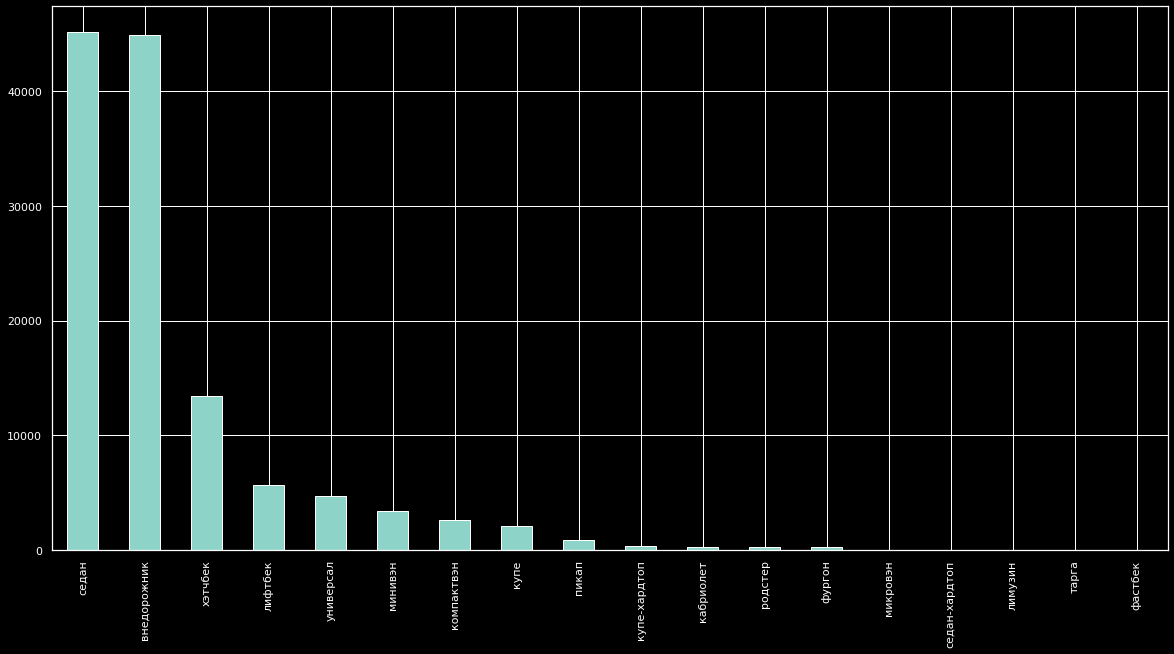

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
plt.style.use("dark_background")
data['body_type'].value_counts().plot(kind='bar')

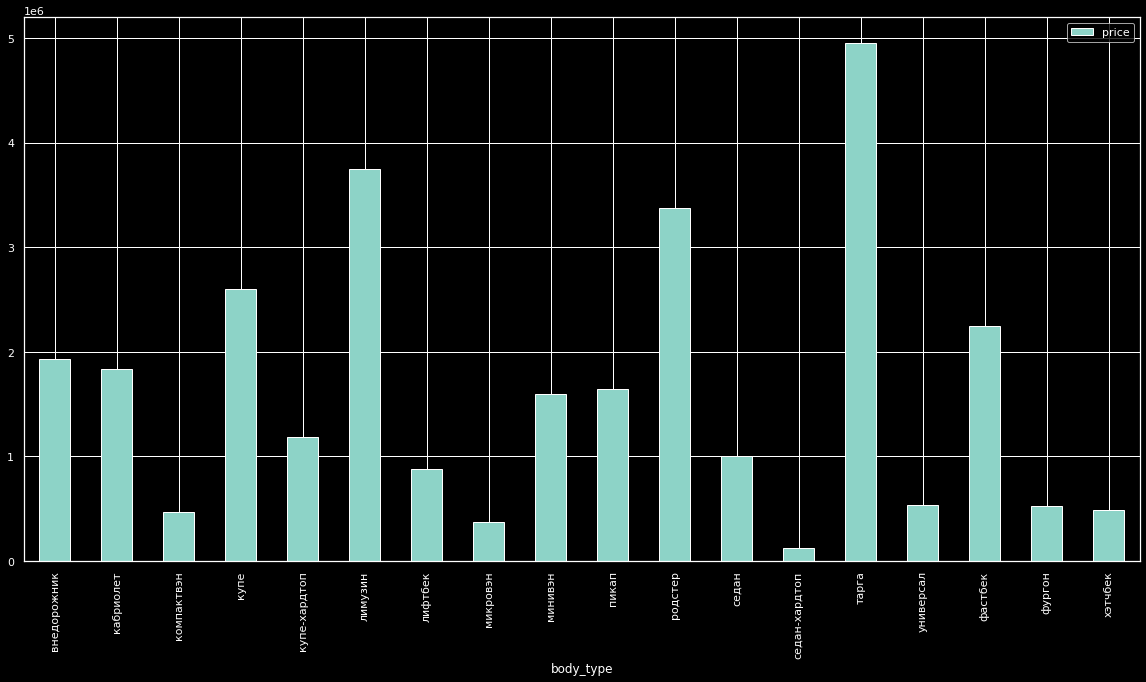

In [ ]:
pd.pivot_table(data=data, values='price', index='body_type').plot(kind='bar')

## brand

In [ ]:
data['brand'].value_counts()

MERCEDES      12192
BMW           11866
VOLKSWAGEN    11543
NISSAN        10165
TOYOTA         8737
AUDI           7505
MITSUBISHI     6776
HYUNDAI        5734
KIA            5630
SKODA          5547
FORD           4797
CHEVROLET      3633
VOLVO          3536
OPEL           3114
RENAULT        2713
HONDA          2328
MAZDA          2311
INFINITI       1911
LEXUS          1888
PEUGEOT        1641
LAND_ROVER     1623
CITROEN        1146
DAEWOO         1041
SUBARU          932
SUZUKI          872
SSANG_YONG      717
PORSCHE         713
CHERY           566
JEEP            483
GREAT_WALL      420
DODGE           418
CHRYSLER        323
CADILLAC        322
JAGUAR          313
MINI            312
GEELY           295
Name: brand, dtype: int64

In [ ]:
data['brand'] = data['brand'].apply(lambda x: x.lower())

In [ ]:
data.groupby('brand')['price'].agg(['count','mean','median'])

,count,mean,median
brand,,,
audi,4070,1.502617e+06,920000.0
bmw,7365,2.387441e+06,1650000.0
cadillac,319,3.107875e+06,1420000.0
chery,562,2.729204e+05,190000.0
chevrolet,3615,4.791753e+05,320000.0
chrysler,321,4.900189e+05,325000.0
citroen,1140,6.793227e+05,399999.5
daewoo,1034,1.262277e+05,114900.0
dodge,417,8.833105e+05,330000.0


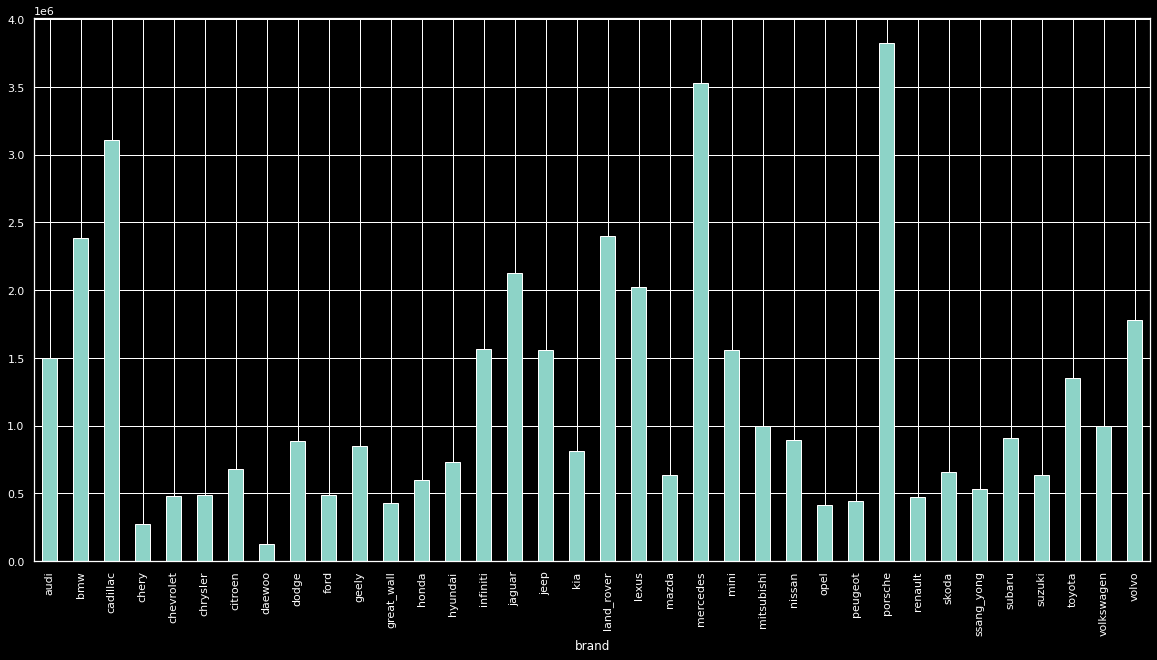

In [ ]:
data.groupby('brand')['price'].mean().plot(kind='bar')

## color

### Предобработка

Переменная в тренировочном датафрейме записана в кодовом формате, а в тестовом явно на русском , сразу отформатируем переменную

In [ ]:
data['color']

0              синий
1             чёрный
2              серый
3         коричневый
4              белый
             ...    
124058        040001
124059        CACECB
124060        040001
124061        97948F
124062        FAFBFB
Name: color, Length: 124063, dtype: object

In [ ]:
def color_change(row):
  """ Функция вернет color(eng.) вместо цвета(рус.) или кодового обозначения цвета """

  for_return = ''
  if row == '040001' or row == 'чёрный': 
    for_return = 'black'
  if row == 'EE1D19' or row == 'красный': 
    for_return = 'red'
  if row == '0000CC' or row == 'синий': 
    for_return = 'blue'
  if row == 'CACECB' or row == 'серебристый': 
    for_return = 'silver_light'
  if row == '007F00' or row == 'зелёный': 
    for_return = 'green'
  if row == 'FAFBFB' or row == 'белый': 
    for_return = 'white'
  if row == '97948F' or row == 'серый': 
    for_return = 'silver_dark'
  if row == '22A0F8' or row == 'голубой': 
    for_return = 'blue_light'
  if row == '660099' or row == 'фиолетовый': 
    for_return = 'purple'
  if row == '200204' or row == 'коричневый':
    for_return = 'brown'
  if row == 'C49648' or row == 'золотистый': 
    for_return = 'gold'
  if row == 'DEA522' or row == 'бежевый':
    for_return = 'beige'
  if row == '4A2197' or row == 'пурпурный': 
    for_return = 'purple_light'
  if row == 'FFD600' or row == 'жёлтый': 
    for_return = 'yellow'
  if row == 'FF8649' or row == 'оранжевый': 
    for_return = 'orange'
  if row == 'FFC0CB' or row == 'розовый': 
    for_return = 'pink'
  return for_return

In [ ]:
data['color'] = data['color'].apply(lambda x: color_change(x))

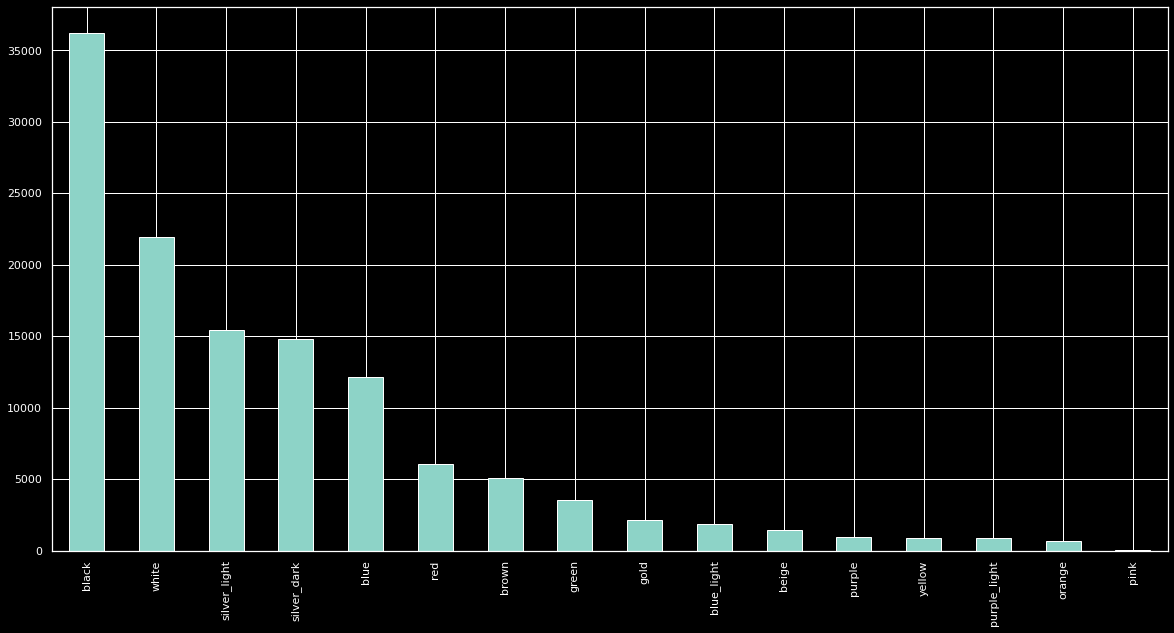

In [ ]:
data['color'].value_counts().plot(kind='bar')

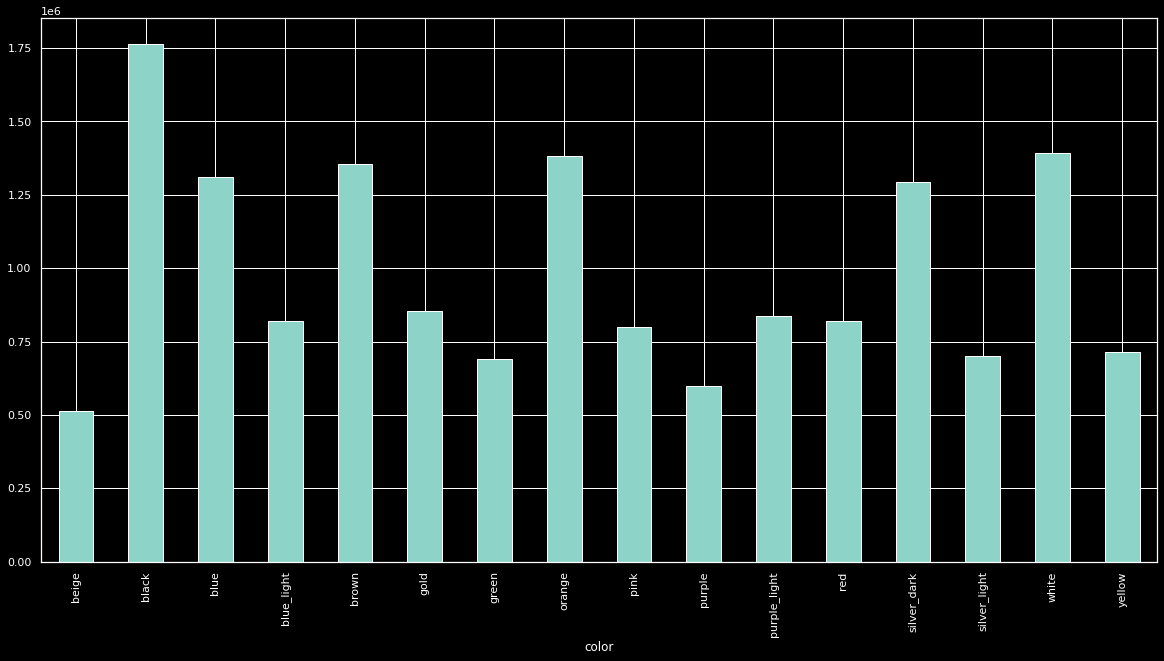

In [ ]:
data.groupby('color')['price'].mean().plot(kind='bar')

## complectation_dict

In [ ]:
len(data)

124063

In [ ]:
data['complectation_dict'].value_counts(dropna=False)

{'id': '0'}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [ ]:
data['complectation_sum'] = 0


data['complectation_sum'] = data['complectation_dict'].apply(lambda x: len(str(x).split(',')))

In [ ]:
data

,body_type,brand,color,complectation_dict,description,engine_displacement,engine_power,fuel_type,mileage,model_date,...,vehicle_transmission,owners,ownership,original_auto_doc,drive,left_wheel,customs,train,price,complectation_sum
0,лифтбек,skoda,blue,NaN,"Все автомобили, представленные в продаже, прох...",1.2 LTR,105 N12,бензин,74000,2013.0,...,роботизированная,3 или более,NaN,Оригинал,передний,Левый,Растаможен,0,NaN,1
1,лифтбек,skoda,black,NaN,ЛОТ: 01217195\nАвтопрага Север\nДанный автомоб...,1.6 LTR,110 N12,бензин,60563,2017.0,...,механическая,1 владелец,NaN,Оригинал,передний,Левый,Растаможен,0,NaN,1
2,лифтбек,skoda,silver_dark,"{""id"":""20026336"",""name"":""Ambition"",""available_...","Все автомобили, представленные в продаже, прох...",1.8 LTR,152 N12,бензин,88000,2013.0,...,роботизированная,1 владелец,NaN,Оригинал,передний,Левый,Растаможен,0,NaN,42
3,лифтбек,skoda,brown,"{""id"":""20803582"",""name"":""Ambition"",""available_...",КОМПЛЕКТ ЗИМНЕЙ (ЛЕТНЕЙ) РЕЗИНЫ ПО СЕЗОНУ В ПО...,1.6 LTR,110 N12,бензин,95000,2013.0,...,автоматическая,1 владелец,NaN,Оригинал,передний,Левый,Растаможен,0,NaN,131
4,лифтбек,skoda,white,NaN,ЛОТ: 01220889\nАвтопрага Север\n\nВы можете по...,1.8 LTR,152 N12,бензин,58536,2008.0,...,автоматическая,1 владелец,NaN,Оригинал,передний,Левый,Растаможен,0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124058,минивэн,ssang_yong,black,{'id': '0'},СВЕТИТ КРУТИТ РАБОТАЕТ ВСЁ. БЕЗ ТОРГА .В МОСК...,2.7d,163.0,дизель,260000,2004.0,...,AUTOMATIC,3.0,NaN,ORIGINAL,полный,LEFT,True,1,450000.0,1
124059,минивэн,ssang_yong,silver_light,{'id': '0'},"Автомобиль на ходу, каждый день в движении.\nС...",2.7d,163.0,дизель,300000,2004.0,...,AUTOMATIC,3.0,"{'year': 2017, 'month': 2}",ORIGINAL,полный,LEFT,True,1,485000.0,1
124060,минивэн,ssang_yong,black,"{'id': '10408082', 'name': 'Luxury', 'availabl...","Автомобиль куплен в декабре 2015 г., новым. Вс...",2.0d,149.0,дизель,126000,2013.0,...,AUTOMATIC,1.0,"{'year': 2015, 'month': 12}",ORIGINAL,полный,LEFT,True,1,1090000.0,139
124061,минивэн,ssang_yong,silver_dark,"{'id': '10408081', 'name': 'Elegance', 'availa...",Продаю семейного любимца. Большой вместительны...,2.0d,149.0,дизель,84000,2013.0,...,AUTOMATIC,3.0,"{'year': 2017, 'month': 10}",ORIGINAL,полный,LEFT,True,1,1180000.0,137


Выдвенем гепотизу, что объявления, в которых отсутсвует информация о комплектации (или комплектации нет в машине) ведет к тому, что цена на машину падает

Значение 1 присутствует только у пропусков

In [ ]:
data['complectation_sum'] = data['complectation_sum'].replace(1,0)

In [ ]:
data['complectation_sum'].mean()

26.876941553887946

In [ ]:
data['complectation_sum_qcut'] = pd.cut(data['complectation_sum'], 20, duplicates='drop')

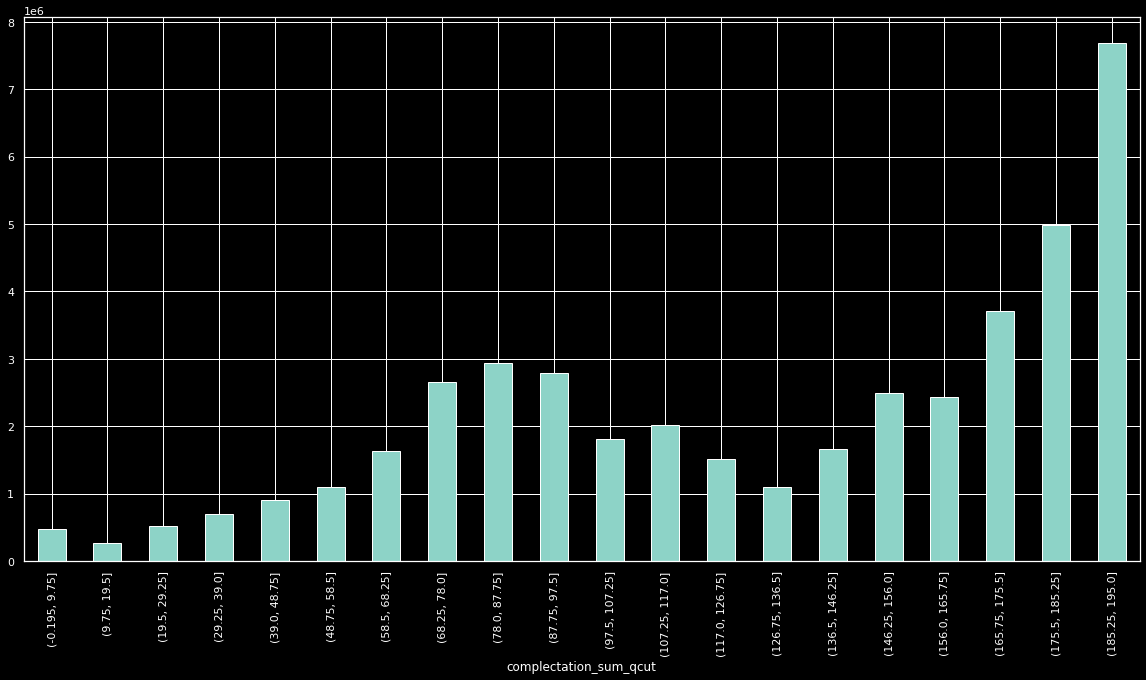

In [ ]:
data.groupby('complectation_sum_qcut')['price'].median().plot(kind='bar')

In [ ]:
data[data['complectation_sum'] == 0]['price'].mean()

751870.3142196768

In [ ]:
data['price'].mean()

1294599.5588251823

## description

Выдвенем гепотизу, что отсутсвие описания машины от владельца присуще машинам, которые дешевле стоят. Гипотиза основывается на мнении, что наличие описания у машины позволяет обосновать более высокую цену автомобиля. В объявлении редко описывается машина с негативной стороны, коментарнии обычно позитивные, что и позволяет поднять цену за машину.

In [ ]:
t = pd.DataFrame(data['description'].value_counts(dropna=False))

In [ ]:
description_non_unique = list(t[t['description'] > 5].index)

In [ ]:
description_non_unique

[nan,
 'Выгода до 82 000 руб. при обмене на Ваш автомобиль! \nВыгода при покупке в кредит до 100 000 руб.! \nРОЛЬФ ЯСЕНЕВО с пробегом. \n-Мы принимаем любые легковые и коммерческие автомобили независимо от марки, года выпуска, пробега и состояния автомобиля. \n-В наличии более 500 проверенных и готовых к продаже автомобилей. \n-Более 400 комплектов шин, дисков, колес в сборе. \n-Все автомобили проходят комплексную проверку - техническую, криминалистическую, проверку истории кузовных ремонтов сертифицированными специалистами. \n-Мы предоставляем гарантию юридической чистоты в соответствии с законодательством РФ. \n-Мы работаем каждый день с 9:00 до 22:00 (без выходных). \nУслуги: \n• Срочный выкуп Вашего автомобиля \n• Выкуп кредитных а/м \n• Trade-in - обмен Вашего автомобиля на новый или с пробегом (возможна доплата с любой стороны) \n• Выездная оценка Вашего а/м \n• Комиссионная продажа (на Ваших условиях) \n• Аукцион \n• Кредитование \n• Страхование КАСКО, ОСАГО \n• Дополнительное о

In [ ]:
data['car_dealerships'] = data['description'].apply(lambda x: 1 if x in description_non_unique else 0)

In [ ]:
data['car_dealerships'].value_counts()

0    112034
1     12029
Name: car_dealerships, dtype: int64

In [ ]:
t = pd.DataFrame(data.groupby(['brand', 'car_dealerships'])['price'].mean())

In [ ]:
t = t.reset_index()

In [ ]:
t

,brand,car_dealerships,price
0,audi,0,1.372375e+06
1,audi,1,2.315585e+06
2,bmw,0,2.355048e+06
3,bmw,1,2.682768e+06
4,cadillac,0,3.187670e+06
...,...,...,...
67,toyota,1,1.809101e+06
68,volkswagen,0,9.391628e+05
69,volkswagen,1,1.326724e+06
70,volvo,0,1.765592e+06


Визуально познакомился с датафреймом - зависимость не обнаружена

In [ ]:
data = data.drop('car_dealerships', axis=1)

Предположим, что у объявлений без комментария продавца цена ниже

In [ ]:
data['description'].fillna(0, inplace=True)

In [ ]:
data['description'] = data['description'].apply(lambda x: 1 if x != 0 else 0)

In [ ]:
data['description'].value_counts(dropna=False)

1    120809
0      3254
Name: description, dtype: int64

In [ ]:
data.groupby('description')['price'].mean()

description
0    7.727068e+05
1    1.314286e+06
Name: price, dtype: float64

Действительно цена ниже, оставим признак

## engine_power

In [ ]:
data['engine_power']

0         105 N12
1         110 N12
2         152 N12
3         110 N12
4         152 N12
           ...   
124058      163.0
124059      163.0
124060      149.0
124061      149.0
124062      149.0
Name: engine_power, Length: 124063, dtype: object

In [ ]:
data['engine_power'].value_counts(ascending=True).head(50)

591.0      1
195 N12    1
480 N12    1
591 N12    1
254 N12    1
301 N12    1
412.0      1
338 N12    1
526.0      1
44 N12     1
430 N12    1
702.0      1
492.0      1
608.0      1
251.0      1
570.0      1
761.0      1
680.0      1
17.0       1
475.0      1
11.0       1
40 N12     1
108 N12    1
321 N12    1
127 N12    1
485 N12    1
431 N12    1
303 N12    1
522 N12    1
639 N12    1
630 N12    1
383 N12    1
402 N12    1
514 N12    1
626 N12    1
38 N12     1
32 N12     1
66 N12     1
324 N12    1
477.0      1
164 N12    1
316 N12    1
30.0       1
61 N12     1
303.0      1
42 N12     1
437.0      1
513.0      1
232.0      1
321.0      1
Name: engine_power, dtype: int64

In [ ]:
data['engine_power'].isna().sum()

0

### Предобработка

In [ ]:
data['engine_power'] = data['engine_power'].apply(lambda x: str(x).split(' ')[0].lower())

In [ ]:
data['engine_power'] = data['engine_power'].apply(lambda x: x[:3])

In [ ]:
data['engine_power'] = pd.to_numeric(data['engine_power'], errors='coerce')

### Анализ

In [ ]:
t = data.copy()

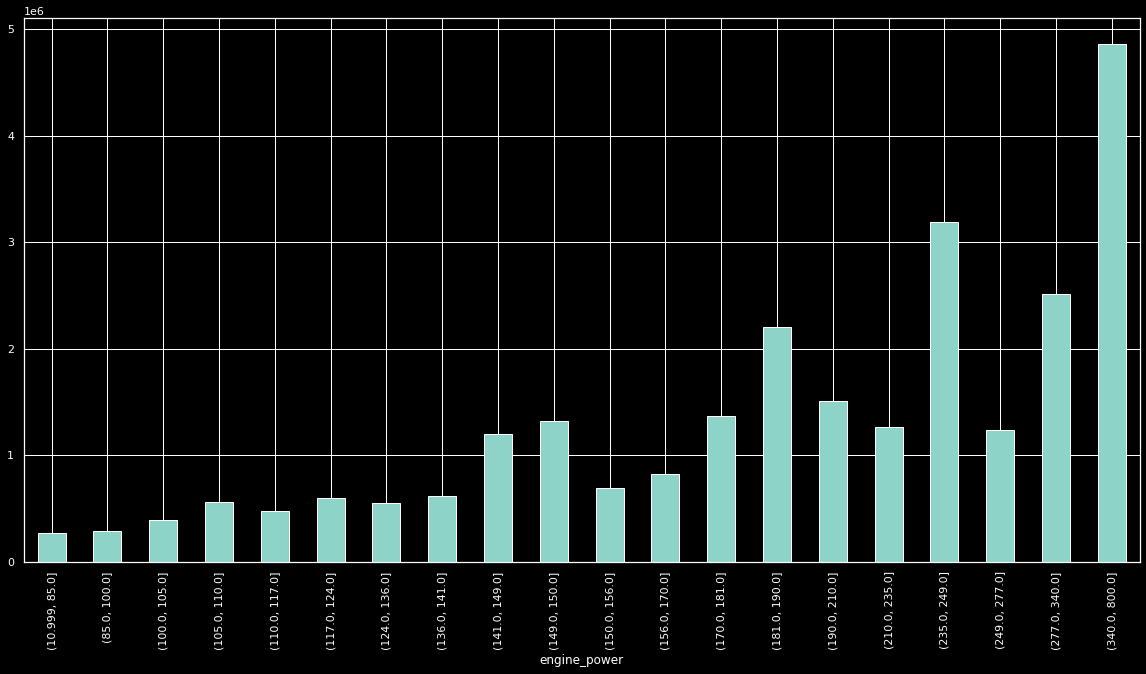

In [ ]:
t['engine_power'] = pd.qcut(data['engine_power'], 20)

t[t['price'] > 0].groupby('engine_power')['price'].mean().plot(kind='bar')

Отметим, что зависимость цены от мощности двигателя имеется,а так же резкий спад цены в диапазоне 250лс - связанно это с тем, что при превышении этой отметки взывается большой наог на имущество

## engine_displacement

### Предобработка

Требуется отформатировать признак. В объем двигателя часто указывается тип топлива (d), обозначение литража (LTR), номер модели (5xx) и прочие слова, символы)

In [ ]:
data['engine_displacement'].value_counts(ascending=True).head(15)

Emina        1
Z06          1
6.6d         1
Base         1
EV           1
7.5          1
7.4          1
6.5d         1
116          1
1.4hyb       1
3.6hyb       1
5-doors      1
Донинвест    1
Aircross     1
Triomphe     1
Name: engine_displacement, dtype: int64

In [ ]:
# оставим только цифры и разделитель "."
data['engine_displacement'] = data['engine_displacement'].str.replace(r"[^/0//1/2/3/4/5/6/7/8/9/.]", "", regex=True)

In [ ]:
# Переведем столбец в числовые значения, где этого сделать не получится - заменим на np.nan
data['engine_displacement'] = pd.to_numeric(data['engine_displacement'], errors='coerce')
data['engine_displacement'].fillna(np.nan, inplace=True)

Приведем значение объема двигателя к общему измерению

In [ ]:
def normalize_engine_displacement(row):
  
  """ Функция корректирует значения переменной и переводит литраж двигателя в корректный вид, по следующей логике:
  1) Если литраж указан меньше 10 - это корректно
  2) Если от 10 до 100 - корректный литраж получится при делении на 10
  3) Если от 100 - первая цифра это номер модели, вторая и третья обозначают объем двигателя в литрах """

  if row < 10.0:
    return row
  if row >= 10.0 and row <= 100.0:
    return row / 10
  if row >= 100:
    t = row % 100
    return t / 10


In [ ]:
data['engine_displacement'] = data['engine_displacement'].apply(lambda x: normalize_engine_displacement(x))

In [ ]:
data['engine_displacement'].isna().sum()

3430

Много пропусков

### Анализ

Распределение объема двигателя 

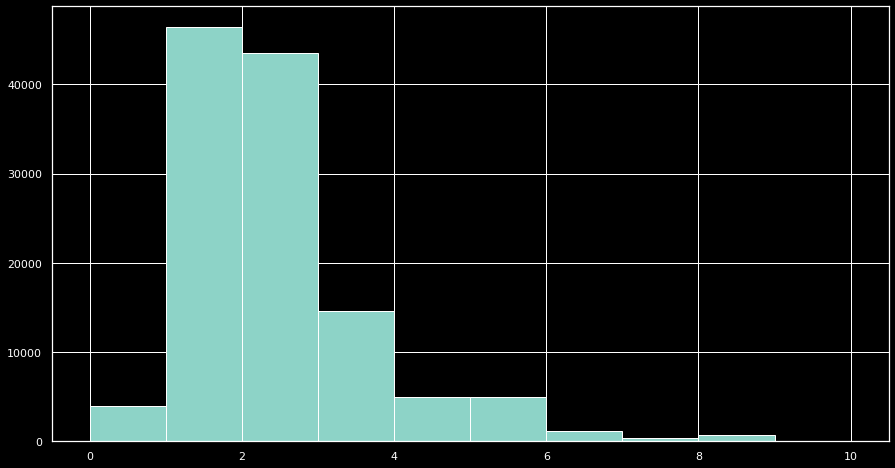

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.style.use("dark_background")

data['engine_displacement'].hist()

In [ ]:
data['engine_displacement'].value_counts(normalize=True).head(10) * 100

2.0    21.616805
1.6    18.567888
1.8     7.706846
3.0     6.802450
1.4     6.069649
2.5     5.883962
2.4     4.557625
3.5     3.019074
5.0     2.985916
0.0     2.839190
Name: engine_displacement, dtype: float64

Разброс цены в зависимости от объема двигателя

Посмотрим точнее на распределение объема двигателя. Заметим, что выше 5л очень мало представителей, что может нам говорить о несоответсвии оценки этих авто рыночной за счет отсутвия достатчоной базы (кол-ва объявлений) 

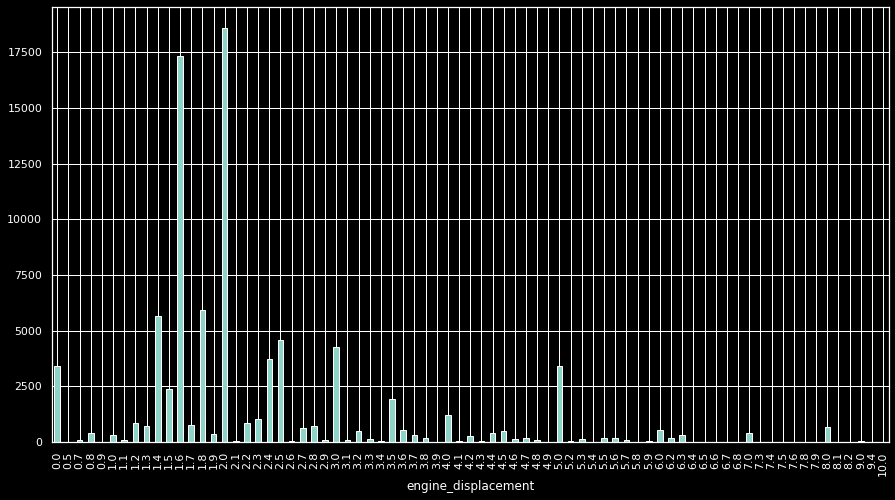

In [ ]:
data.groupby('engine_displacement')['price'].count().plot(kind='bar')

Карта возраста машины, объема двигателя, с значением стоимости

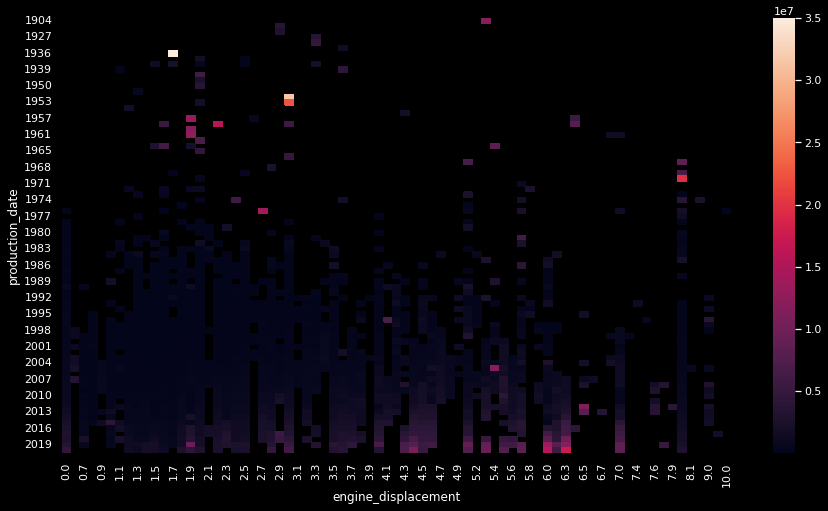

In [ ]:
sns.heatmap(data.pivot_table(index='production_date', columns='engine_displacement', aggfunc='median', values='price'))

Обратим внимание, что более новые машины стоят дороже, чем свои предшественники, однако есть "раритеты" в штучных экземплярах, которые выделяются в карте. Обрежим карту и посмотрим на основную массу машин

In [ ]:
# Машины старше 1990г

t = data[data['production_date'] > 1990].pivot_table(index='production_date', columns='engine_displacement', aggfunc='median', values='price')

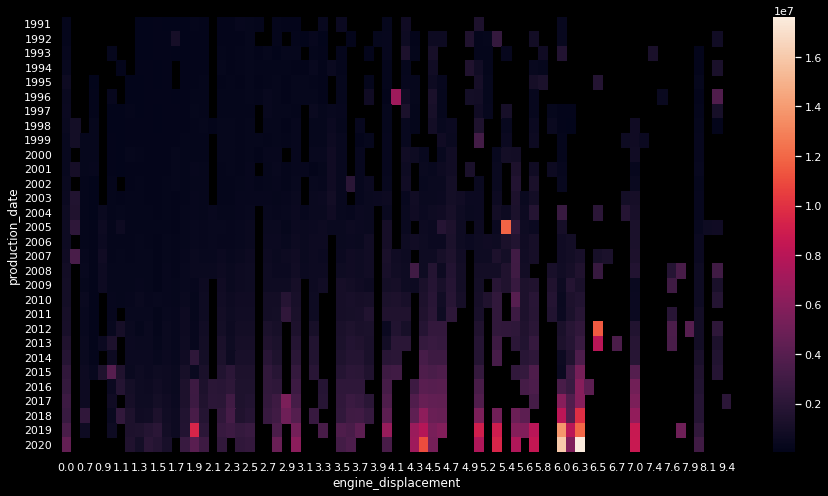

In [ ]:
sns.heatmap(t)

In [ ]:
# Младше 1990г и объем бвигателя до 7 литоров

t = (data[(data['production_date'] > 1990) & (data['engine_displacement'] < 7)].pivot_table
     (index='production_date', columns='engine_displacement', aggfunc='median', values='price'))

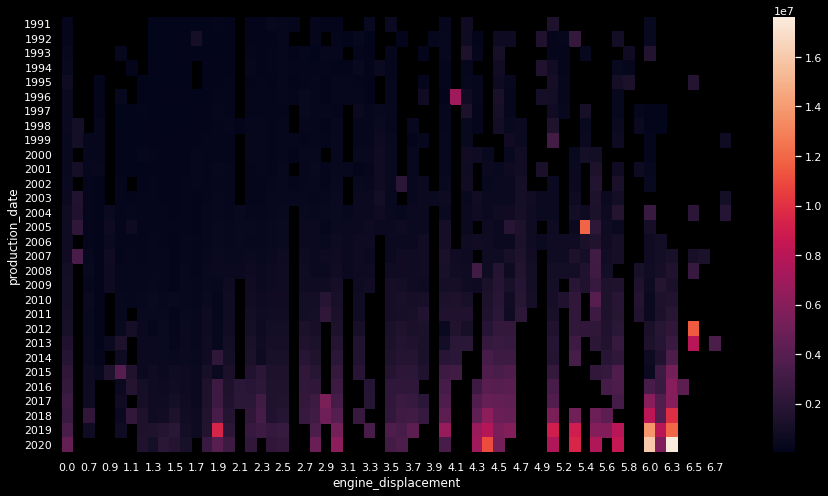

In [ ]:
sns.heatmap(t)

Прослеживается тенденция - чем больше объем двигателя и машина новее - тем выше ее цена

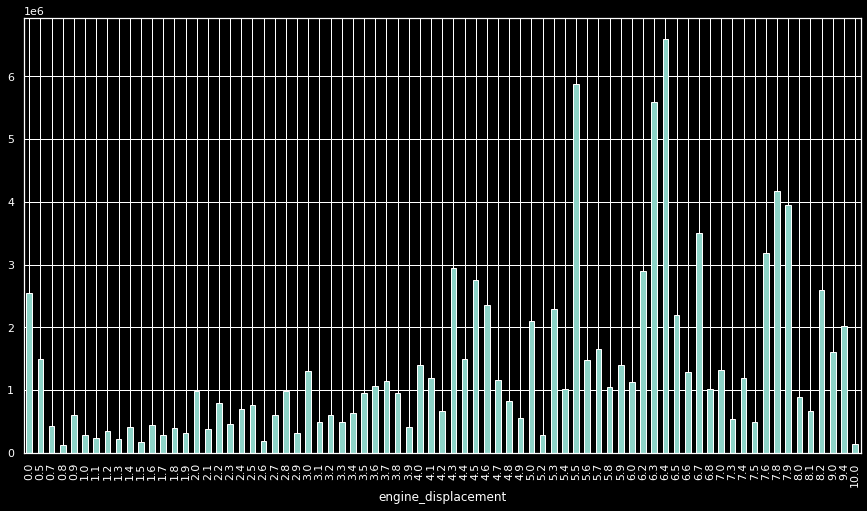

In [ ]:
t = data[data['price'] > 0]
t.groupby('engine_displacement')['price'].median().plot(kind='bar')

Визуализируем в более приятном глазу масштабе

In [ ]:
data['engine_displacement_cut'] = pd.cut(data['engine_displacement'], [-1, 1.9, 3.9, 5.9, np.inf])

In [ ]:
# Все машины

t = (data.pivot_table(index='production_date', columns='engine_displacement_cut', 
                                                      aggfunc='median', values='price'))

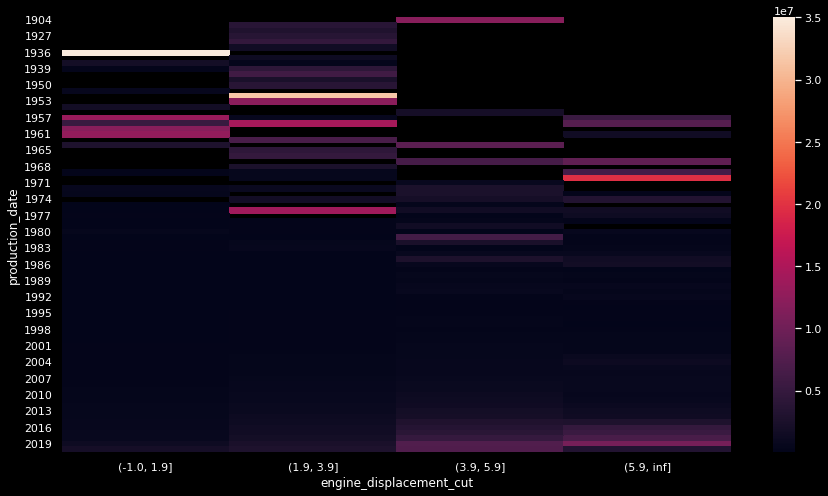

In [ ]:
sns.heatmap(t)

In [ ]:
#Машины старше 1990г

t = (data[data['production_date'] > 1990].pivot_table(index='production_date', 
                                                      columns='engine_displacement_cut', 
                                                      aggfunc='median', values='price'))

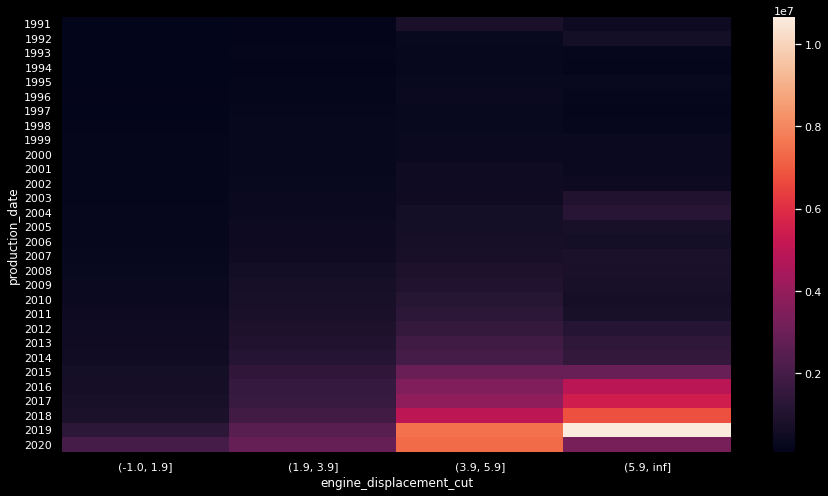

In [ ]:
sns.heatmap(t)

## fuel_type

In [ ]:
data['fuel_type'].unique()

array(['бензин', 'дизель', 'гибрид', 'электро', 'газ'], dtype=object)

In [ ]:
data.groupby('fuel_type')['price'].mean()

fuel_type
бензин     1.074967e+06
газ        5.552727e+05
гибрид     1.850706e+06
дизель     2.444254e+06
электро    4.366572e+06
Name: price, dtype: float64

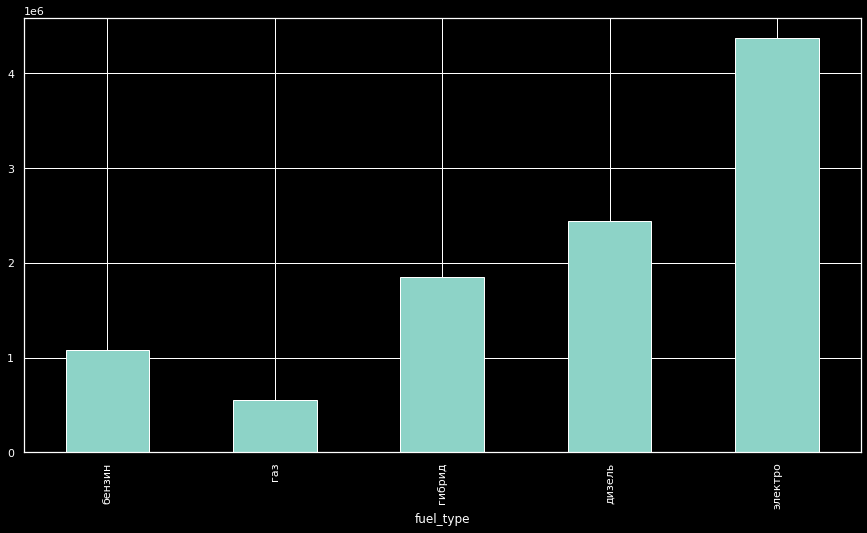

In [ ]:
data.groupby('fuel_type')['price'].mean().plot(kind='bar')

## mileage

In [ ]:
t = data[data['price'] >= 0].copy()

In [ ]:
t['mileage'] = pd.qcut(t['mileage'], 20, duplicates='drop')

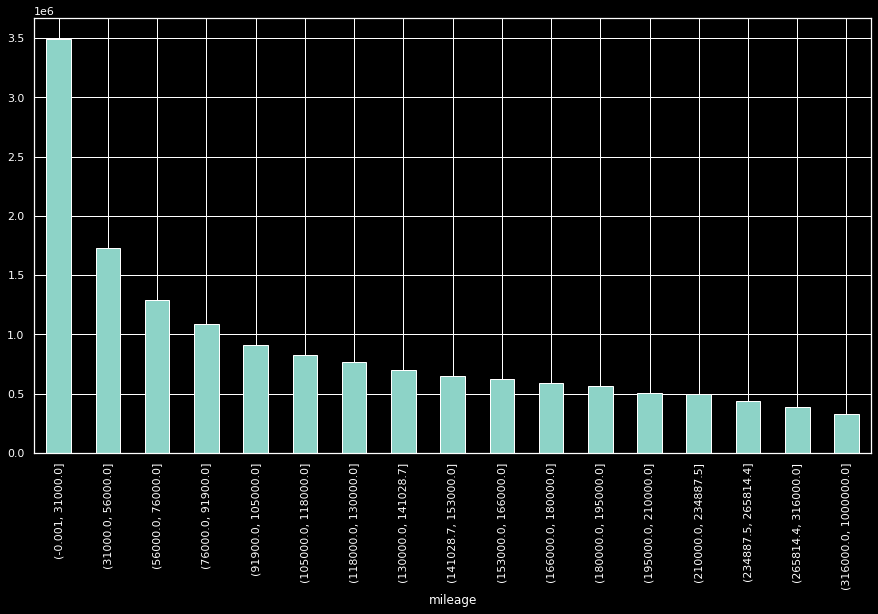

In [ ]:
t.groupby('mileage')['price'].mean().plot(kind='bar')

In [ ]:
t = t.pivot_table(index='production_date', columns='mileage',
              aggfunc='median', values='price')

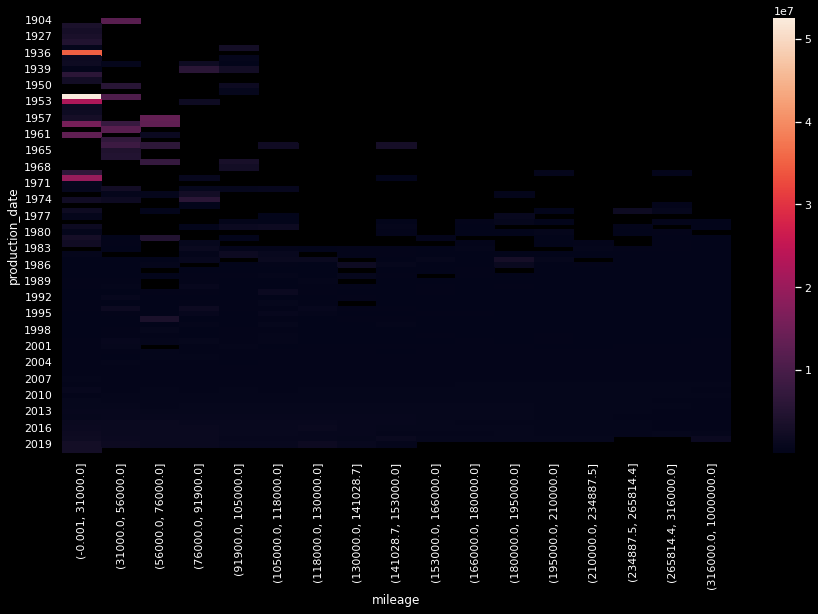

In [ ]:
sns.heatmap(t)

Раритетные машины со старым пробегом - самые дорогие в выборке

In [ ]:
#Машины старше 1990г
t = data.copy()
t['mileage'] = pd.qcut(t['mileage'], 20, duplicates='drop')

t = (t[t['production_date'] > 1990].pivot_table(index='production_date',columns='mileage',
                                                aggfunc='median', values='price'))

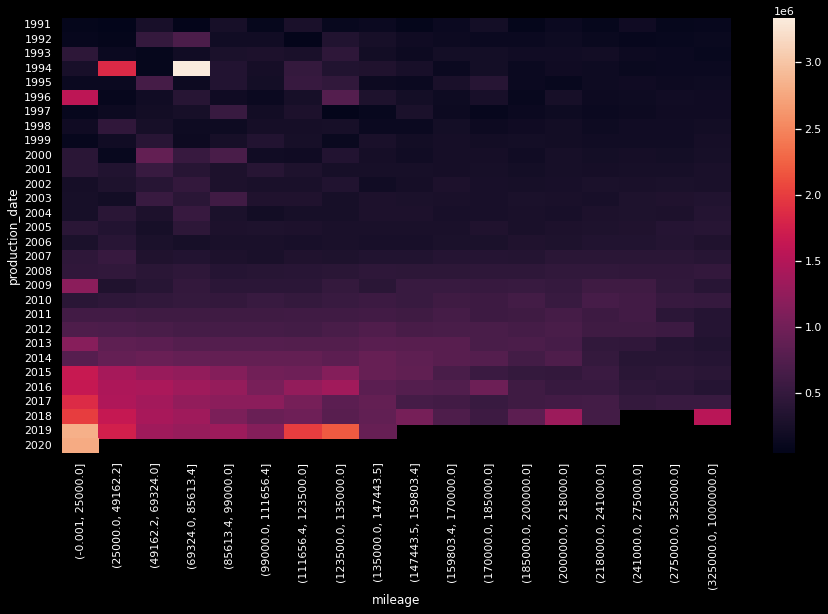

In [ ]:
sns.heatmap(t)

Подтверждена зависимость цены машины от пробега. Так же наблюдается ценность старых автомобилей, где маленький пробег

## model_date

In [ ]:
data[['model', 'model_date']]

,model,model_date
0,OCTAVIA,2013.0
1,OCTAVIA,2017.0
2,SUPERB,2013.0
3,OCTAVIA,2013.0
4,OCTAVIA,2008.0
...,...,...
124058,RODIUS,2004.0
124059,RODIUS,2004.0
124060,STAVIC,2013.0
124061,STAVIC,2013.0


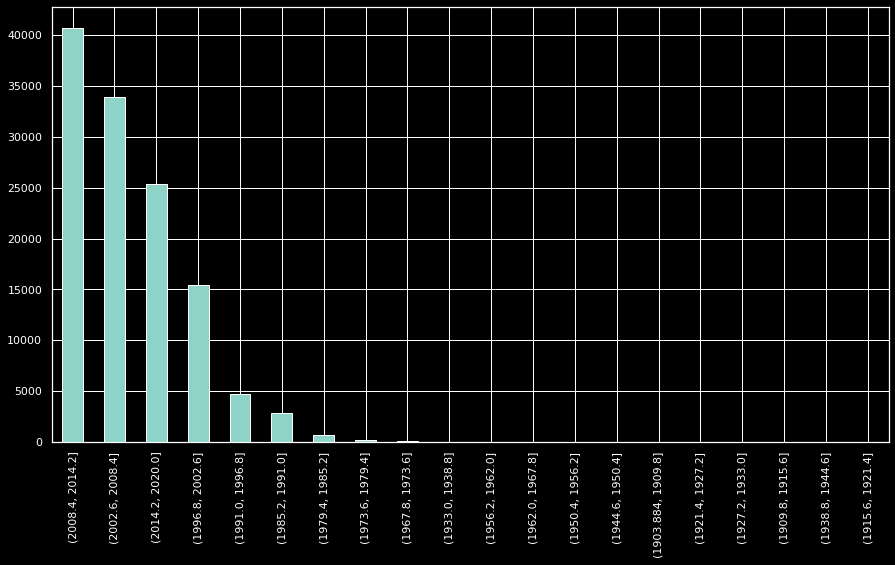

In [ ]:
pd.cut(data['model_date'], 20, duplicates='drop').value_counts().plot(kind='bar')

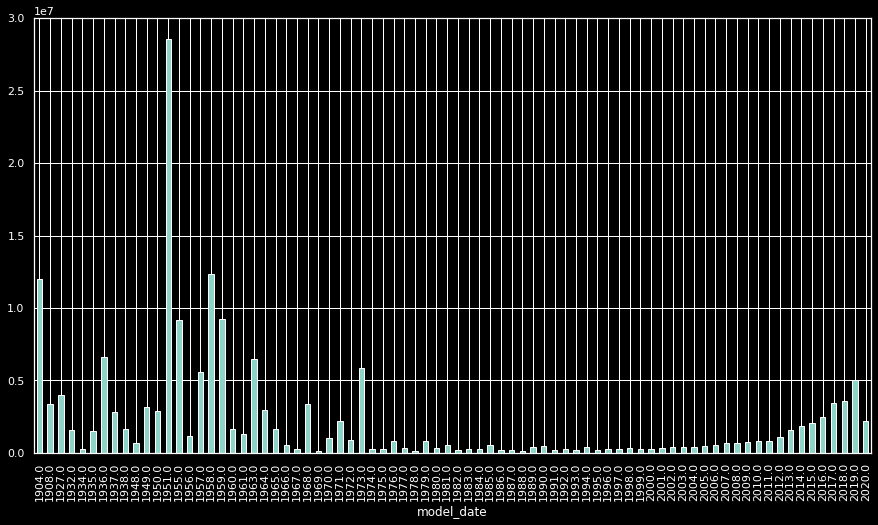

In [ ]:
data.groupby('model_date')['price'].mean().plot(kind='bar')

Наблюдаем жирный хвост в распределении выше - старых машин мало, но они дорогие

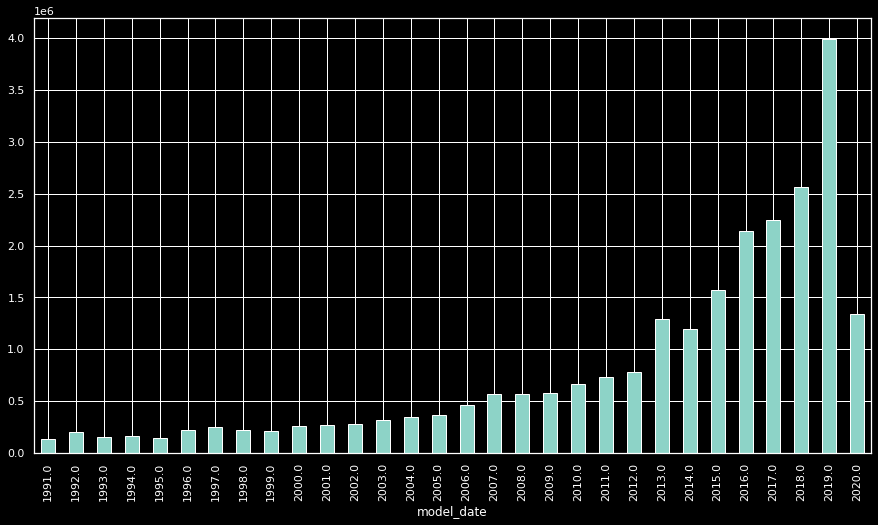

In [ ]:
# машины старше 1990 г, медиана
data[data['model_date'] > 1990].groupby('model_date')['price'].median().plot(kind='bar')

## model

In [ ]:
len(data['model'].unique())

1104

In [ ]:
data[data['price'] > 0].groupby('model')['price'].mean()

model
02             1.000000e+06
100            1.264352e+05
1007           4.075000e+05
100NX          1.800000e+05
100_SERIES     1.500000e+05
                   ...     
ZAFIRA         4.525762e+05
ZAFIRA_LIFE    3.167900e+06
ZAFIRA_OPC     3.250000e+05
ZEPHYR         7.000000e+05
ZX             4.750000e+04
Name: price, Length: 1086, dtype: float64

## number_of_doors

In [ ]:
data['number_of_doors'].value_counts(dropna=False)

5.0    70328
4.0    47773
2.0     3099
3.0     2861
0.0        2
Name: number_of_doors, dtype: int64

In [ ]:
# тут действительно 0 дверей
data[data['number_of_doors'] == 0.0]

,body_type,brand,color,complectation_dict,description,engine_displacement,engine_power,fuel_type,mileage,model_date,...,ownership,original_auto_doc,drive,left_wheel,customs,train,price,complectation_sum,complectation_sum_qcut,engine_displacement_cut
16944,кабриолет,mercedes,white,NaN,1,5.3,32.0,бензин,48000,1904.0,...,6 лет и 8 месяцев,Оригинал,задний,Правый,Растаможен,0,NaN,0,"(-0.195, 9.75]","(3.9, 5.9]"
122750,кабриолет,mercedes,white,{'id': '0'},1,5.3,32.0,бензин,48000,1904.0,...,"{'year': 2014, 'month': 2}",ORIGINAL,задний,RIGHT,True,1,12000000.0,0,"(-0.195, 9.75]","(3.9, 5.9]"


In [ ]:
data['number_of_doors'] = data['number_of_doors'].apply(lambda x: int(x))

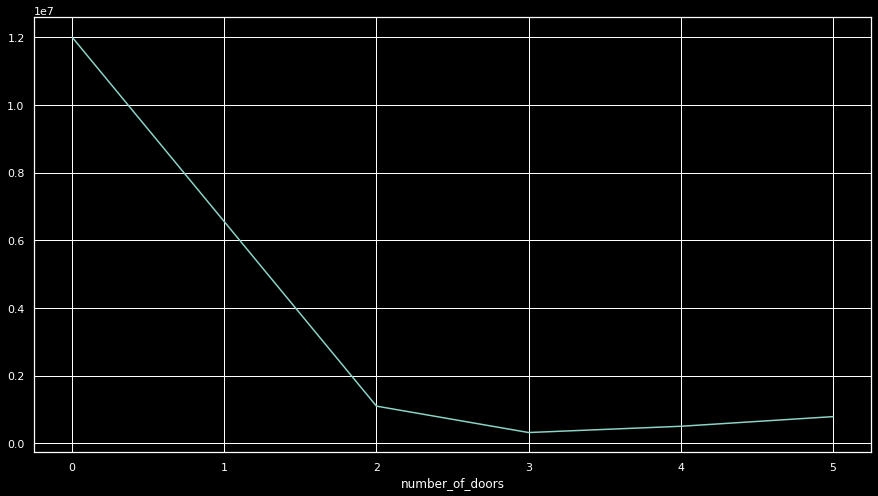

In [ ]:
data.groupby('number_of_doors')['price'].median().plot()

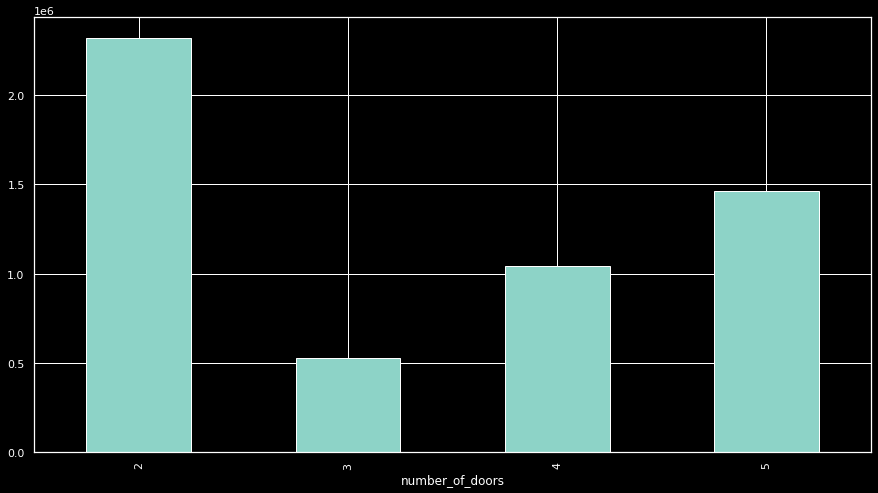

In [ ]:
# Машины старше 1990
data[data['production_date'] > 1990].groupby('number_of_doors')['price'].mean().plot(kind='bar')

## production_date

In [ ]:
data[['production_date', 'model_date', 'model', 'price']]

,production_date,model_date,model,price
0,2014,2013.0,OCTAVIA,NaN
1,2017,2017.0,OCTAVIA,NaN
2,2014,2013.0,SUPERB,NaN
3,2014,2013.0,OCTAVIA,NaN
4,2012,2008.0,OCTAVIA,NaN
...,...,...,...,...
124058,2006,2004.0,RODIUS,450000.0
124059,2007,2004.0,RODIUS,485000.0
124060,2014,2013.0,STAVIC,1090000.0
124061,2013,2013.0,STAVIC,1180000.0


Проверим визуальное наличие корреляции между model_date и product_date

Кол-во машин в каждом бине (несколько лет)

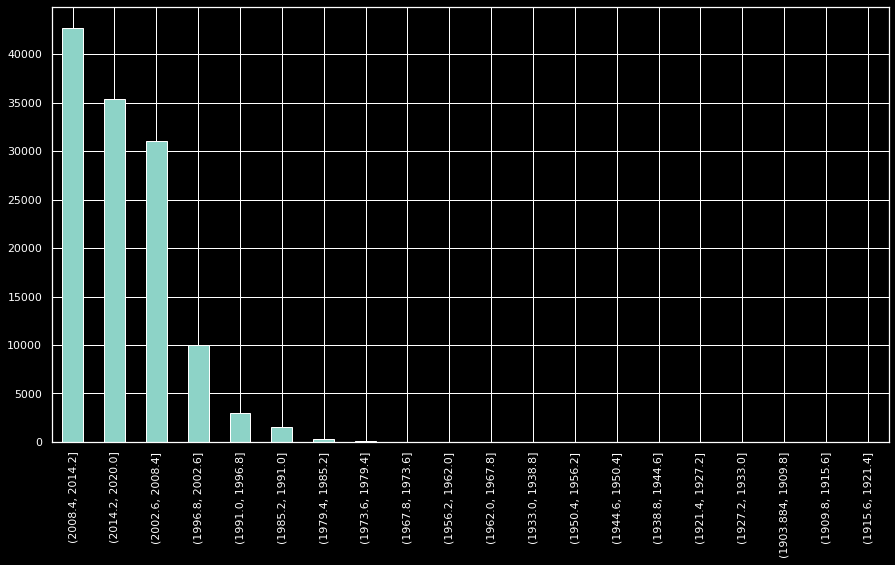

In [ ]:
pd.cut(data['production_date'], 20, duplicates='drop').value_counts().plot(kind='bar')

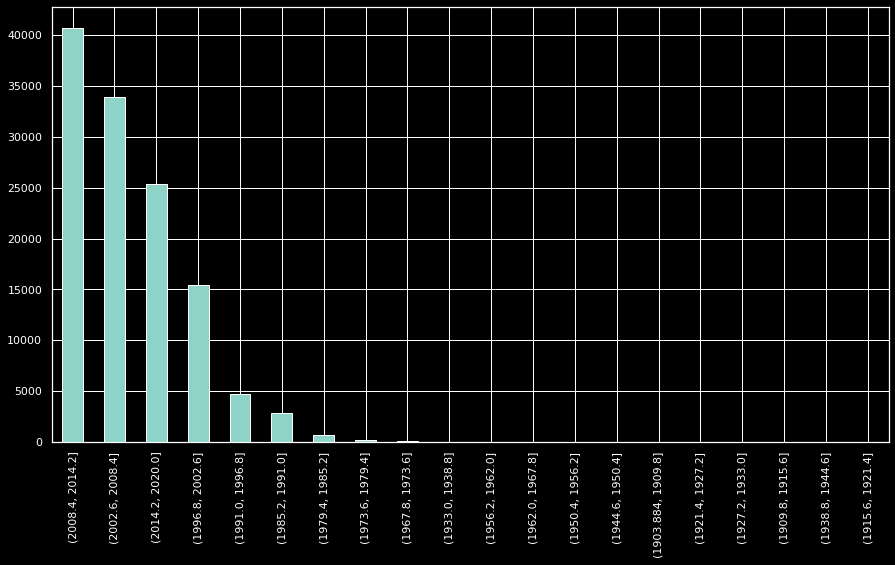

In [ ]:
pd.cut(data['model_date'], 20, duplicates='drop').value_counts().plot(kind='bar')

Кол-во машин по годам

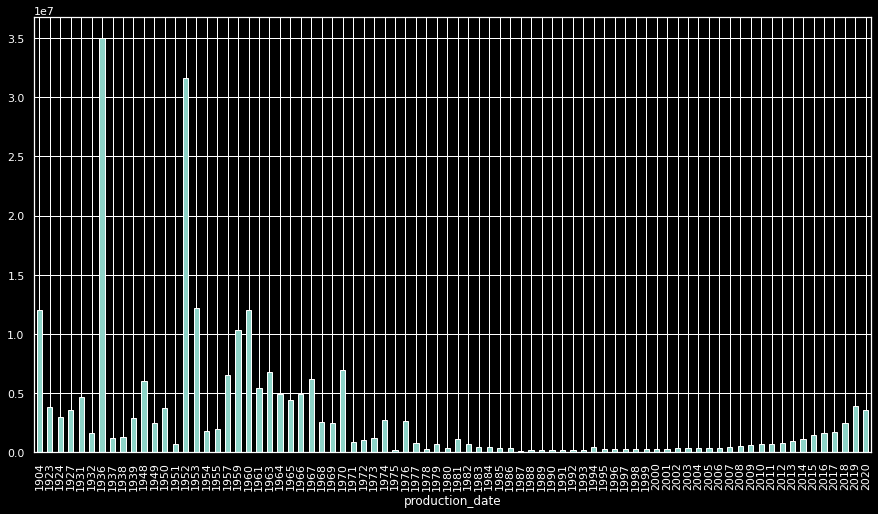

In [ ]:
data.groupby('production_date')['price'].mean().plot(kind='bar')

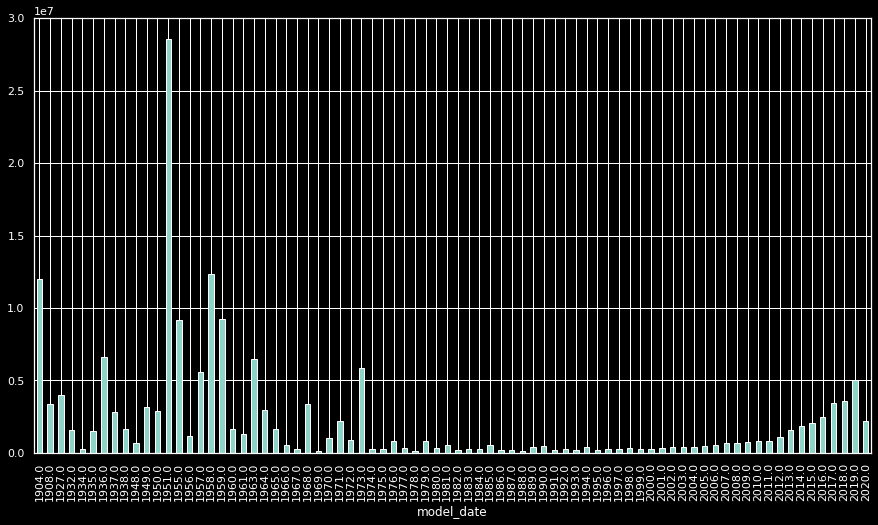

In [ ]:
data.groupby('model_date')['price'].mean().plot(kind='bar')

Распределение современных машин

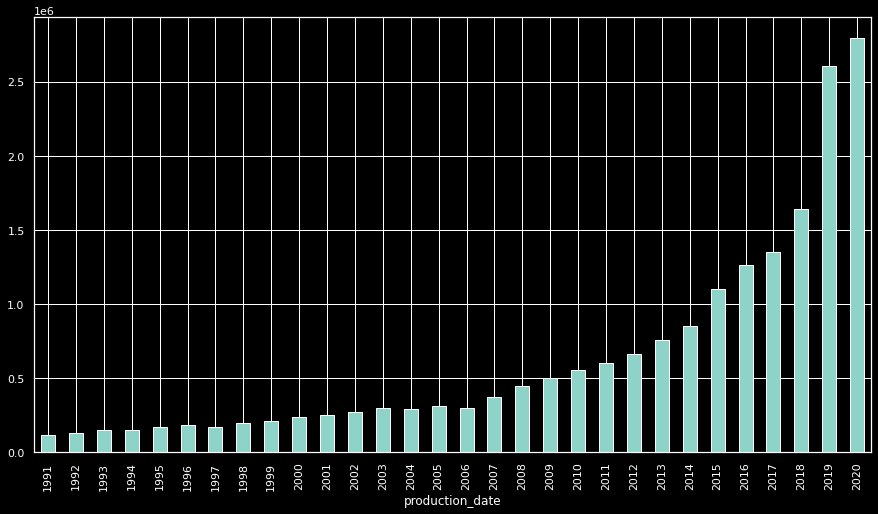

In [ ]:
# машины старше 1990 г, медиана
data[data['production_date'] > 1990].groupby('production_date')['price'].median().plot(kind='bar')

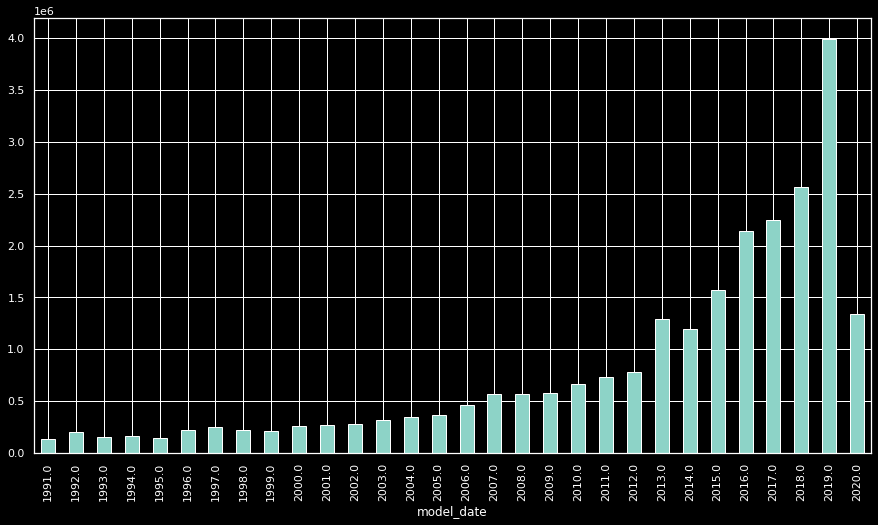

In [ ]:
# машины старше 1990 г, медиана
data[data['model_date'] > 1990].groupby('model_date')['price'].median().plot(kind='bar')

Визуально значительная корреляция, посмотрим на линейную 

In [ ]:
data.corr()

,description,engine_displacement,engine_power,mileage,model_date,number_of_doors,production_date,train,price,complectation_sum
description,1.000000,0.008251,0.026760,-0.041296,0.031793,0.010176,0.029609,-0.102241,0.051970,0.054068
engine_displacement,0.008251,1.000000,0.609323,0.010009,0.005493,0.031090,-0.011252,-0.052121,0.258728,0.014440
engine_power,0.026760,0.609323,1.000000,-0.165085,0.218991,-0.001996,0.190921,-0.089081,0.555258,0.150795
mileage,-0.041296,0.010009,-0.165085,1.000000,-0.692621,-0.095373,-0.719204,-0.118375,-0.465624,-0.498603
model_date,0.031793,0.005493,0.218991,-0.692621,1.000000,0.186396,0.970983,0.088530,0.440737,0.512484
number_of_doors,0.010176,0.031090,-0.001996,-0.095373,0.186396,1.000000,0.196023,0.040074,0.052437,0.097650
production_date,0.029609,-0.011252,0.190921,-0.719204,0.970983,0.196023,1.000000,0.099602,0.451186,0.526111
train,-0.102241,-0.052121,-0.089081,-0.118375,0.088530,0.040074,0.099602,1.000000,NaN,0.151032
price,0.051970,0.258728,0.555258,-0.465624,0.440737,0.052437,0.451186,NaN,1.000000,0.471681
complectation_sum,0.054068,0.014440,0.150795,-0.498603,0.512484,0.097650,0.526111,0.151032,0.471681,1.000000


Большая корреляция у переменных model date и product date (0.970983)

Не будем удалять одну из фичей, она пригадиться для создания новой категориальной фичи

## name

In [ ]:
data['name']

0             1.2 AMT (105 л.с.)
1              1.6 MT (110 л.с.)
2         DSG 1.8 AMT (152 л.с.)
3              1.6 AT (110 л.с.)
4              1.8 AT (152 л.с.)
                   ...          
124058    2.7d AT (163 л.с.) 4WD
124059    2.7d AT (163 л.с.) 4WD
124060    2.0d AT (149 л.с.) 4WD
124061    2.0d AT (149 л.с.) 4WD
124062    2.0d AT (149 л.с.) 4WD
Name: name, Length: 124063, dtype: object

С помощью переменной можно заполнить пропуски в engine_displacement

In [ ]:
t = data['name'][757]
t

'DSG 1.8 AMT (152 л.с.)'

In [ ]:
start_ = t.rfind('(')
end_ = t.rfind('л.с.')

In [ ]:
t[start_ + 1 : end_ -1]

'152'

## vehicle_configuration  

In [ ]:
t = data['vehicle_configuration'].unique()

In [ ]:
for i in t:
  print(i)

LIFTBACK ROBOT 1.2
LIFTBACK MECHANICAL 1.6
LIFTBACK ROBOT 1.8
LIFTBACK AUTOMATIC 1.6
LIFTBACK AUTOMATIC 1.8
LIFTBACK ROBOT 2.0
ALLROAD_5_DOORS ROBOT 1.8
ALLROAD_5_DOORS MECHANICAL 1.4
ALLROAD_5_DOORS MECHANICAL 1.8
LIFTBACK ROBOT 1.4
ALLROAD_5_DOORS ROBOT 1.4
ALLROAD_5_DOORS ROBOT 2.0
ALLROAD_5_DOORS MECHANICAL 1.2
LIFTBACK MECHANICAL 1.4
HATCHBACK_5_DOORS AUTOMATIC 1.6
HATCHBACK_5_DOORS MECHANICAL 1.2
ALLROAD_5_DOORS ROBOT 1.2
SEDAN AUTOMATIC 1.8
COMPACTVAN AUTOMATIC 1.6
WAGON_5_DOORS ROBOT 2.0
LIFTBACK MECHANICAL 1.8
ALLROAD_5_DOORS AUTOMATIC 1.6
HATCHBACK_5_DOORS ROBOT 1.2
WAGON_5_DOORS ROBOT 1.8
WAGON_5_DOORS AUTOMATIC 1.6
HATCHBACK_5_DOORS MECHANICAL 1.3
HATCHBACK_5_DOORS MECHANICAL 1.4
LIFTBACK MECHANICAL 1.2
COMPACTVAN MECHANICAL 1.2
WAGON_5_DOORS MECHANICAL 1.2
HATCHBACK_5_DOORS MECHANICAL 1.6
WAGON_5_DOORS MECHANICAL 1.4
WAGON_5_DOORS ROBOT 1.0
LIFTBACK ROBOT 3.6
COMPACTVAN MECHANICAL 1.4
WAGON_5_DOORS ROBOT 1.4
WAGON_5_DOORS MECHANICAL 1.6
WAGON_5_DOORS MECHANICAL 1.8
ALLROAD

In [ ]:
# В нижний регистр
data['vehicle_configuration'] = data['vehicle_configuration'].apply(lambda x: str(x).lower())

In [ ]:
def vehicle_type(row):
  if 'robot' in row:
    return 'rob'
  elif 'automatic' in row:
    return 'auto'
  elif 'mechanical' in row:
    return 'mech'
  elif 'variator' in row:
    return 'var'
  else:
    return row

In [ ]:
data['vehicle_configuration'] = data['vehicle_configuration'].apply(lambda x: vehicle_type(x))

In [ ]:
data['vehicle_configuration']

0          rob
1         mech
2          rob
3         auto
4         auto
          ... 
124058    auto
124059    auto
124060    auto
124061    auto
124062    auto
Name: vehicle_configuration, Length: 124063, dtype: object

In [ ]:
data['vehicle_configuration'].value_counts()

auto    68814
mech    32473
rob     11753
var     11023
Name: vehicle_configuration, dtype: int64

In [ ]:
data.groupby('vehicle_configuration')['price'].mean()

vehicle_configuration
auto    1.697965e+06
mech    4.197502e+05
rob     1.564438e+06
var     1.315472e+06
Name: price, dtype: float64

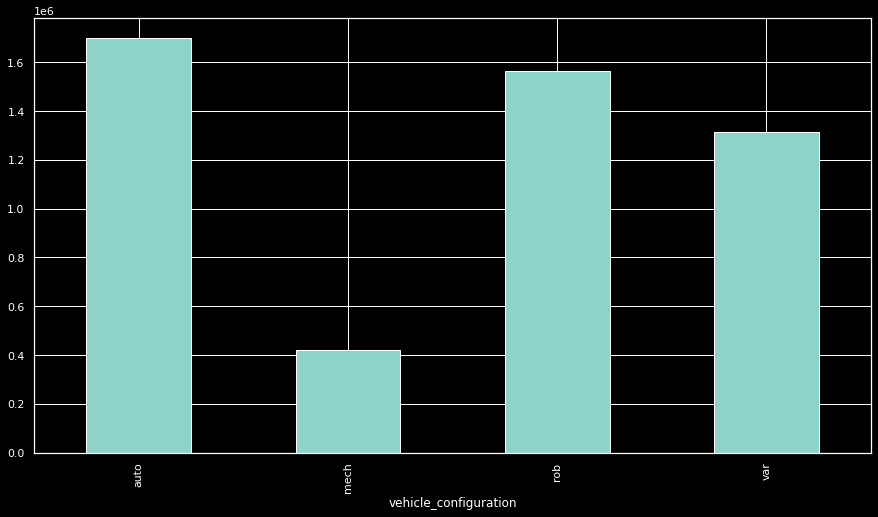

In [ ]:
data.groupby('vehicle_configuration')['price'].mean().plot(kind='bar')

## vehicle_transmission

In [ ]:
data

,body_type,brand,color,complectation_dict,description,engine_displacement,engine_power,fuel_type,mileage,model_date,...,ownership,original_auto_doc,drive,left_wheel,customs,train,price,complectation_sum,complectation_sum_qcut,engine_displacement_cut
0,лифтбек,skoda,blue,NaN,1,1.2,105.0,бензин,74000,2013.0,...,NaN,Оригинал,передний,Левый,Растаможен,0,NaN,0,"(-0.195, 9.75]","(-1.0, 1.9]"
1,лифтбек,skoda,black,NaN,1,1.6,110.0,бензин,60563,2017.0,...,NaN,Оригинал,передний,Левый,Растаможен,0,NaN,0,"(-0.195, 9.75]","(-1.0, 1.9]"
2,лифтбек,skoda,silver_dark,"{""id"":""20026336"",""name"":""Ambition"",""available_...",1,1.8,152.0,бензин,88000,2013.0,...,NaN,Оригинал,передний,Левый,Растаможен,0,NaN,42,"(39.0, 48.75]","(-1.0, 1.9]"
3,лифтбек,skoda,brown,"{""id"":""20803582"",""name"":""Ambition"",""available_...",1,1.6,110.0,бензин,95000,2013.0,...,NaN,Оригинал,передний,Левый,Растаможен,0,NaN,131,"(126.75, 136.5]","(-1.0, 1.9]"
4,лифтбек,skoda,white,NaN,1,1.8,152.0,бензин,58536,2008.0,...,NaN,Оригинал,передний,Левый,Растаможен,0,NaN,0,"(-0.195, 9.75]","(-1.0, 1.9]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124058,минивэн,ssang_yong,black,{'id': '0'},1,2.7,163.0,дизель,260000,2004.0,...,NaN,ORIGINAL,полный,LEFT,True,1,450000.0,0,"(-0.195, 9.75]","(1.9, 3.9]"
124059,минивэн,ssang_yong,silver_light,{'id': '0'},1,2.7,163.0,дизель,300000,2004.0,...,"{'year': 2017, 'month': 2}",ORIGINAL,полный,LEFT,True,1,485000.0,0,"(-0.195, 9.75]","(1.9, 3.9]"
124060,минивэн,ssang_yong,black,"{'id': '10408082', 'name': 'Luxury', 'availabl...",1,2.0,149.0,дизель,126000,2013.0,...,"{'year': 2015, 'month': 12}",ORIGINAL,полный,LEFT,True,1,1090000.0,139,"(136.5, 146.25]","(1.9, 3.9]"
124061,минивэн,ssang_yong,silver_dark,"{'id': '10408081', 'name': 'Elegance', 'availa...",1,2.0,149.0,дизель,84000,2013.0,...,"{'year': 2017, 'month': 10}",ORIGINAL,полный,LEFT,True,1,1180000.0,137,"(136.5, 146.25]","(1.9, 3.9]"


In [ ]:
data[['vehicle_configuration', 'vehicle_transmission']]

,vehicle_configuration,vehicle_transmission
0,rob,роботизированная
1,mech,механическая
2,rob,роботизированная
3,auto,автоматическая
4,auto,автоматическая
...,...,...
124058,auto,AUTOMATIC
124059,auto,AUTOMATIC
124060,auto,AUTOMATIC
124061,auto,AUTOMATIC


Корлонка дублируется, удалим ее

In [ ]:
data.drop('vehicle_transmission', axis=1, inplace=True)

## owners

In [ ]:
data['owners'].value_counts(dropna=False)

3.0            36247
2.0            21006
1.0            18536
3 или более    15957
NaN            13588
1 владелец      9459
2 владельца     9270
Name: owners, dtype: int64

In [ ]:
data['owners'] = data['owners'].str.replace(r"[^/0//1/2/3/4/5/6/7/8/9/]", "", regex=True)

In [ ]:
data['owners'].value_counts(dropna=False, normalize=True) * 100

NaN    72.041624
3      12.862014
1       7.624352
2       7.472010
Name: owners, dtype: float64

72% пропусков - удалим признак

In [ ]:
data.drop('owners', axis=1, inplace=True)

## ownership

In [ ]:
data['ownership'].value_counts(dropna=False)

NaN                            82867
{'year': 2018, 'month': 10}      497
{'year': 2019, 'month': 8}       494
{'year': 2018, 'month': 8}       492
{'year': 2018, 'month': 9}       478
                               ...  
18 лет и 5 месяцев                 1
18 лет и 2 месяца                  1
{'year': 2002, 'month': 10}        1
18 лет и 4 месяца                  1
{'year': 1997, 'month': 7}         1
Name: ownership, Length: 566, dtype: int64

67% пропусков - удалим признак

In [ ]:
data.drop('ownership', axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124063 entries, 0 to 124062
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   body_type                124063 non-null  object  
 1   brand                    124063 non-null  object  
 2   color                    124063 non-null  object  
 3   complectation_dict       95795 non-null   object  
 4   description              124063 non-null  int64   
 5   engine_displacement      120633 non-null  float64 
 6   engine_power             124063 non-null  float64 
 7   fuel_type                124063 non-null  object  
 8   mileage                  124063 non-null  int64   
 9   model_date               124063 non-null  float64 
 10  model                    124063 non-null  object  
 11  name                     124063 non-null  object  
 12  number_of_doors          124063 non-null  int64   
 13  production_date          124063 non-null  in

## original_auto_doc

In [ ]:
data['original_auto_doc'].value_counts()

ORIGINAL     78596
Оригинал     30098
DUPLICATE    10420
Дубликат      4587
Name: original_auto_doc, dtype: int64

In [ ]:
def auto_doc_normalize(row):
  if row == 'ORIGINAL':
    return 1
  if row == 'Оригинал':
    return 1
  if row == 'DUPLICATE':
    return 0
  if row == 'Дубликат':
    return 0

In [ ]:
data['original_auto_doc'] = data['original_auto_doc'].apply(lambda x: auto_doc_normalize(x))

In [ ]:
data['original_auto_doc'].value_counts(dropna=False)

1.0    108694
0.0     15007
NaN       362
Name: original_auto_doc, dtype: int64

In [ ]:
data['original_auto_doc'].fillna(0, inplace=True)

In [ ]:
data.groupby('original_auto_doc')['price'].mean()

original_auto_doc
0.0    6.448272e+05
1.0    1.383780e+06
Name: price, dtype: float64

In [ ]:
data['original_auto_doc'] = data['original_auto_doc'].apply(lambda x: int(x))

## drive

In [ ]:
data['drive'].unique()

array(['передний', 'полный', 'задний'], dtype=object)

In [ ]:
def drive_coder(row):
  """ Функция переименовывает тип привода в числовые занчения"""

  if row == 'передний':
    return 'forward'
  if row == 'полный':
    return 'full'
  if row == 'задний':
    return 'back'

In [ ]:
data['drive'] = data['drive'].apply(lambda x: drive_coder(x))

In [ ]:
data['drive'].value_counts()

forward    62880
full       50021
back       11162
Name: drive, dtype: int64

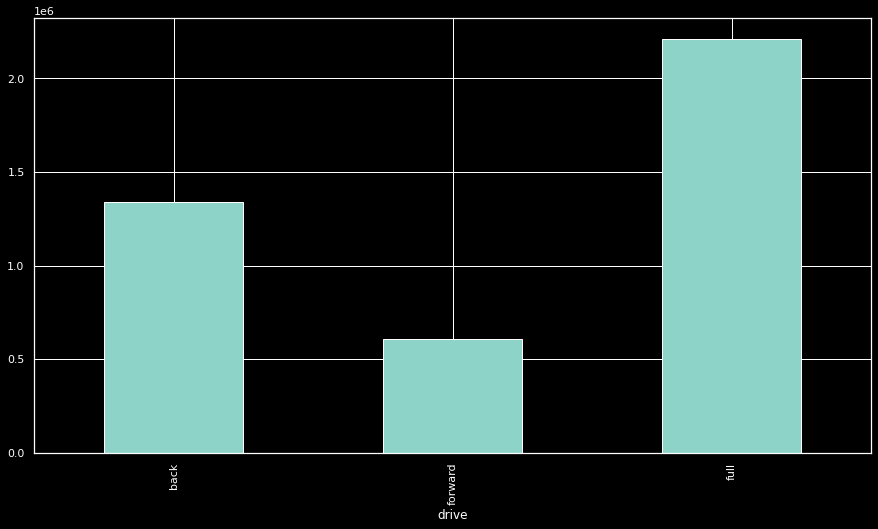

In [ ]:
data.groupby('drive')['price'].mean().plot(kind='bar')

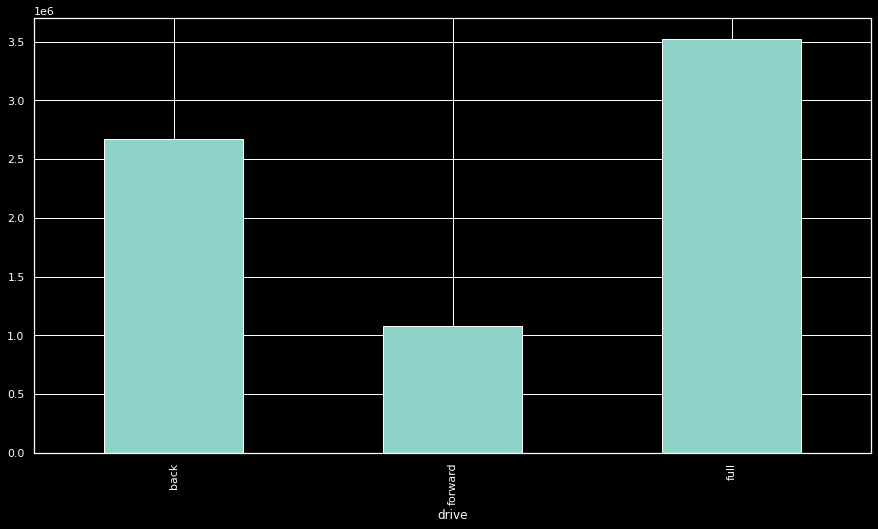

In [ ]:
data[data['model_date'] > 2010].groupby('drive')['price'].mean().plot(kind='bar')

## left_wheel

In [ ]:
data['left_wheel'].unique()

array(['Левый', 'Правый', 'LEFT', 'RIGHT'], dtype=object)

In [ ]:
data['left_wheel'] = data['left_wheel'].apply(lambda x: 1 if x == 'Левый' or x == 'LEFT' else 0)

In [ ]:
data['left_wheel'].value_counts()

1    120875
0      3188
Name: left_wheel, dtype: int64

In [ ]:
data.groupby('left_wheel')['price'].mean()

left_wheel
0    4.145761e+05
1    1.312587e+06
Name: price, dtype: float64

Леворульные машины, в среднем, стоят дороже

## customs

In [ ]:
data['customs'].value_counts(dropna=False)

True          89377
Растаможен    34686
Name: customs, dtype: int64

Видим, что в выборке все машины расстаможены, удалим признак

In [ ]:
data.drop('customs', axis=1, inplace=True)

## price

In [ ]:
data['price'].describe()

count    8.896700e+04
mean     1.294600e+06
std      1.950417e+06
min      1.600000e+04
25%      3.500000e+05
50%      6.500000e+05
75%      1.480000e+06
max      9.900000e+07
Name: price, dtype: float64

In [ ]:
data[data['train'] == 1]['price'].isna().sum()

410

In [ ]:
data[data['train'] == 1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89377 entries, 34686 to 124062
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   body_type                89377 non-null  object  
 1   brand                    89377 non-null  object  
 2   color                    89377 non-null  object  
 3   complectation_dict       89377 non-null  object  
 4   description              89377 non-null  int64   
 5   engine_displacement      86002 non-null  float64 
 6   engine_power             89377 non-null  float64 
 7   fuel_type                89377 non-null  object  
 8   mileage                  89377 non-null  int64   
 9   model_date               89377 non-null  float64 
 10  model                    89377 non-null  object  
 11  name                     89377 non-null  object  
 12  number_of_doors          89377 non-null  int64   
 13  production_date          89377 non-null  int64   
 14  v

# Feature Engenering

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124063 entries, 0 to 124062
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   body_type                124063 non-null  object  
 1   brand                    124063 non-null  object  
 2   color                    124063 non-null  object  
 3   complectation_dict       95795 non-null   object  
 4   description              124063 non-null  int64   
 5   engine_displacement      120633 non-null  float64 
 6   engine_power             124063 non-null  float64 
 7   fuel_type                124063 non-null  object  
 8   mileage                  124063 non-null  int64   
 9   model_date               124063 non-null  float64 
 10  model                    124063 non-null  object  
 11  name                     124063 non-null  object  
 12  number_of_doors          124063 non-null  int64   
 13  production_date          124063 non-null  in

## Обработаем пропуски

### engine_displacement

In [ ]:
data['engine_displacement'] = data['engine_displacement'].fillna(np.nan)
data['engine_displacement'].isna().sum()

3430

Объем двигателя можно спрогнозировать с помощью произведения его мощности на  коэфицент среднего соотношения объема к мощности двигателя в наблюдаемой выборке

In [ ]:
koef = data['engine_power'].mean() / data['engine_displacement'].mean()

In [ ]:
data['engine_displacement'] = data['engine_displacement'].fillna('no_data')

In [ ]:
for i in range(len(data)):
  if data['engine_displacement'][i] == 'no_data':
     data['engine_displacement'][i] = data['engine_power'][i] / koef

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data['engine_displacement'].isna().sum()

0

## Новые фичи

### Флаг повышенного налога

По законодостельству машины, с мощностью от 250 лс включительно, облагаются повышенным налогом. на практике это находит отражение в цене, например одинаковые модели с мощностью в 246лс и 250лс могут значительно отличатсья в цене, где машина с "высоким" налогом в 250лс будет дешевле

In [ ]:
data['engine_power']

0         105.0
1         110.0
2         152.0
3         110.0
4         152.0
          ...  
124058    163.0
124059    163.0
124060    149.0
124061    149.0
124062    149.0
Name: engine_power, Length: 124063, dtype: float64

In [ ]:
data['increased_tax'] = data['engine_power'].apply(lambda x: 1 if x >= 250 else 0)

In [ ]:
data.groupby('increased_tax')['price'].mean()

increased_tax
0    1.054296e+06
1    3.119309e+06
Name: price, dtype: float64

In [ ]:
data.groupby('increased_tax')['engine_power'].mean()

increased_tax
0    150.53441
1    347.79200
Name: engine_power, dtype: float64

### Флаг надежного бренад

Так же воспользуюсь предметными знаниями и создам флаг у моделей, которые считаются более надежными и, по большей части, принадлежат к бизнесс линии

In [ ]:
significant_brand_list = ['audi', 'volvo', 'bmw', 'mercedes', 'toyota', 
                          'lexus', 'dodge', 'jaguar', 'mini', 'porsche', 'land_rover']

In [ ]:
data['significant_brand'] = data['brand'].apply(lambda x: 1 if x in significant_brand_list else 0)

In [ ]:
data['significant_brand'].value_counts()

0    74960
1    49103
Name: significant_brand, dtype: int64

In [ ]:
data.groupby('significant_brand')['price'].mean()

significant_brand
0    7.376667e+05
1    2.352681e+06
Name: price, dtype: float64

### Флаг машины на гарантии

Наличие гарантии на машину повышает стоимость автомобиля

Примерный рассчет - пробег до 50т. км или возраст машины до 3х лет

In [ ]:
data['mileage']

0          74000
1          60563
2          88000
3          95000
4          58536
           ...  
124058    260000
124059    300000
124060    126000
124061     84000
124062    144000
Name: mileage, Length: 124063, dtype: int64

In [ ]:
data['production_date'].max()

2020

In [ ]:
data['warranty'] = 0

In [ ]:
for i in range(len(data)):
  if data['mileage'][i] < 50000:
    data['warranty'][i] = 1
  elif data['production_date'][i] >= 2017:
    data['warranty'][i] = 1
  else:
    data['warranty'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data['warranty'].value_counts()

0    94438
1    29625
Name: warranty, dtype: int64

In [ ]:
data.groupby('warranty')['price'].mean()

warranty
0    6.546860e+05
1    3.042138e+06
Name: price, dtype: float64

### production_date_cut

посмотрим на кол-во объявлений по годам и определим границы бинов вручную

In [ ]:
data[data['production_date'] <= 1980].groupby('production_date')['price'].agg(['count', 'median']).head(50)

,count,median
production_date,,
1904,1,12000000.0
1923,1,3800000.0
1924,1,3000000.0
1927,2,3600000.0
1931,1,4703812.0
1932,2,1590000.0
1936,1,35000000.0
1937,4,1350000.0
1938,5,1500000.0


In [ ]:
data[data['production_date'] > 1980].groupby('production_date')['price'].agg(['count', 'median']).head(50)

,count,median
production_date,,
1981,12,100000.0
1982,16,300000.0
1983,31,310000.0
1984,39,149000.0
1985,49,105000.0
1986,63,90000.0
1987,79,89999.0
1988,127,85000.0
1989,148,100000.0


In [ ]:
# Создадим границы бинов

production_date_cut = [-1, 1950, 1985, 1990, 1995]

for i in range(1997,2021,2):
  production_date_cut.append(i)

production_date_cut.append(np.inf)

In [ ]:
production_date_cut

[-1,
 1950,
 1985,
 1990,
 1995,
 1997,
 1999,
 2001,
 2003,
 2005,
 2007,
 2009,
 2011,
 2013,
 2015,
 2017,
 2019,
 inf]

In [ ]:
data['car_age_cut'] = pd.cut(data['production_date'], production_date_cut)

In [ ]:
data[data['production_date'] < 1970][['car_age_cut', 'production_date']]

,car_age_cut,production_date
1777,"(-1.0, 1950.0]",1939
3174,"(-1.0, 1950.0]",1938
8627,"(1950.0, 1985.0]",1969
9143,"(-1.0, 1950.0]",1950
9373,"(1950.0, 1985.0]",1953
...,...,...
123338,"(-1.0, 1950.0]",1938
123339,"(1950.0, 1985.0]",1953
123340,"(1950.0, 1985.0]",1952
123341,"(1950.0, 1985.0]",1952


In [ ]:
data[data['production_date'] == 2020]

,body_type,brand,color,complectation_dict,description,engine_displacement,engine_power,fuel_type,mileage,model_date,...,left_wheel,train,price,complectation_sum,complectation_sum_qcut,engine_displacement_cut,increased_tax,significant_brand,warranty,car_age_cut
15,внедорожник,skoda,silver_dark,NaN,1,1.4,150.0,бензин,3470,2016.0,...,1,0,NaN,0,"(-0.195, 9.75]","(-1.0, 1.9]",0,0,1,"(2019.0, inf]"
41,внедорожник,skoda,white,NaN,1,2.0,180.0,бензин,9603,2016.0,...,1,0,NaN,0,"(-0.195, 9.75]","(1.9, 3.9]",0,0,1,"(2019.0, inf]"
128,лифтбек,skoda,white,NaN,1,1.4,150.0,бензин,13000,2017.0,...,1,0,NaN,0,"(-0.195, 9.75]","(-1.0, 1.9]",0,0,1,"(2019.0, inf]"
156,внедорожник,skoda,black,"{""id"":""21404914"",""name"":""Hockey Edition"",""avai...",1,2.0,150.0,дизель,138,2016.0,...,1,0,NaN,163,"(156.0, 165.75]","(1.9, 3.9]",0,0,1,"(2019.0, inf]"
381,внедорожник,skoda,black,NaN,1,1.5,150.0,бензин,6181,2017.0,...,1,0,NaN,0,"(-0.195, 9.75]","(-1.0, 1.9]",0,0,1,"(2019.0, inf]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122974,минивэн,mercedes,black,"{'id': '21363629', 'name': 'V250 d Avantgarde ...",1,5.0,190.0,дизель,1,2014.0,...,1,1,25500000.0,64,"(58.5, 68.25]","(3.9, 5.9]",0,1,1,"(2019.0, inf]"
122975,минивэн,mercedes,black,"{'id': '21363629', 'name': 'V250 d Avantgarde ...",1,5.0,190.0,дизель,1,2014.0,...,1,1,19300000.0,64,"(58.5, 68.25]","(3.9, 5.9]",0,1,1,"(2019.0, inf]"
122989,минивэн,mercedes,black,"{'id': '21881655', 'name': 'VIP', 'available_o...",0,0.0,239.0,дизель,1,2014.0,...,1,1,14800000.0,93,"(87.75, 97.5]","(-1.0, 1.9]",0,1,1,"(2019.0, inf]"
122990,минивэн,mercedes,black,{'id': '0'},0,0.0,239.0,дизель,1,2014.0,...,1,1,13700000.0,0,"(-0.195, 9.75]","(-1.0, 1.9]",0,1,1,"(2019.0, inf]"


In [ ]:
data['car_age_cut'].value_counts()

(2011.0, 2013.0]    17517
(2009.0, 2011.0]    15081
(2007.0, 2009.0]    13097
(2019.0, inf]       12784
(2005.0, 2007.0]    12283
(2013.0, 2015.0]    11604
(2015.0, 2017.0]     9427
(2017.0, 2019.0]     8270
(2003.0, 2005.0]     6503
(2001.0, 2003.0]     4723
(1999.0, 2001.0]     3501
(1997.0, 1999.0]     3123
(1990.0, 1995.0]     2762
(1995.0, 1997.0]     1933
(1985.0, 1990.0]     1019
(1950.0, 1985.0]      402
(-1.0, 1950.0]         34
Name: car_age_cut, dtype: int64

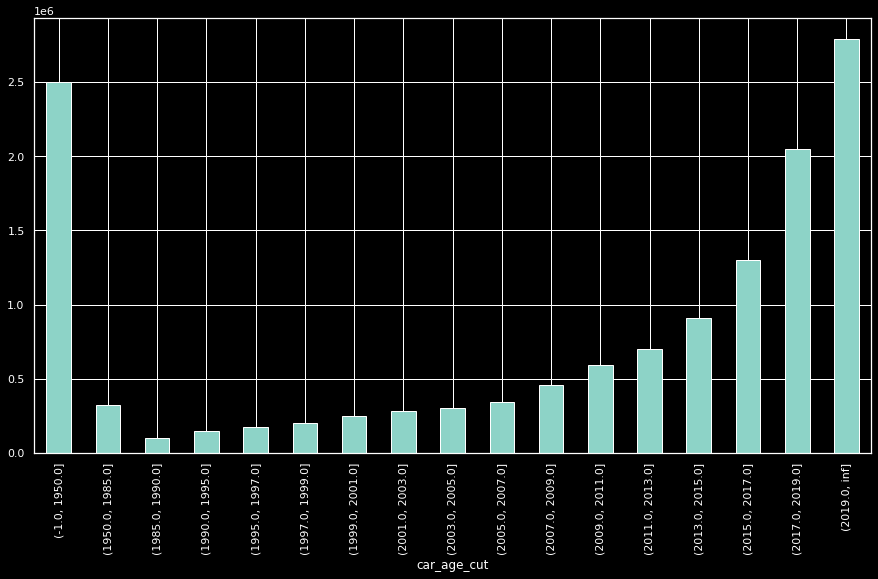

In [ ]:
data.groupby('car_age_cut')['price'].median().plot(kind='bar')

Зависимость сохранена, 80 лет сократили до 16 бинов

В кэтбуст не использовал

### Model + model year

model_year очень сильно коррелирует с product_year и не имеет смысла ее оставлять.

Однако можно улучшить категориальную переменную "model":

У большого числа машин есть разные модели, которые могут быть даже выпущены в одном году, однако отличаться внешне, по комплектации, с технической точки зрения.

Поэтому хорошо было бы указать модели на разницу между "polo" и "polo" создав переменную, где будет указана модель и ее год "polo 2015" и "polo 2018"

In [ ]:
data['model_year'] = ''

In [ ]:
for i in range(len(data)):
  a = data['model'][i]
  b = str(int(data['model_date'][i]))
  c = ' '
  data['model_year'][i] = a + c + b

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
data['model_year']

0         OCTAVIA 2013
1         OCTAVIA 2017
2          SUPERB 2013
3         OCTAVIA 2013
4         OCTAVIA 2008
              ...     
124058     RODIUS 2004
124059     RODIUS 2004
124060     STAVIC 2013
124061     STAVIC 2013
124062     STAVIC 2013
Name: model_year, Length: 124063, dtype: object

In [ ]:
#data.drop(['model','model_date'], axis=1, inplace=True)

In [ ]:
data

,body_type,brand,color,complectation_dict,description,engine_displacement,engine_power,fuel_type,mileage,model_date,...,train,price,complectation_sum,complectation_sum_qcut,engine_displacement_cut,increased_tax,significant_brand,warranty,car_age_cut,model_year
0,лифтбек,skoda,blue,NaN,1,1.2,105.0,бензин,74000,2013.0,...,0,NaN,0,"(-0.195, 9.75]","(-1.0, 1.9]",0,0,0,"(2013.0, 2015.0]",OCTAVIA 2013
1,лифтбек,skoda,black,NaN,1,1.6,110.0,бензин,60563,2017.0,...,0,NaN,0,"(-0.195, 9.75]","(-1.0, 1.9]",0,0,1,"(2015.0, 2017.0]",OCTAVIA 2017
2,лифтбек,skoda,silver_dark,"{""id"":""20026336"",""name"":""Ambition"",""available_...",1,1.8,152.0,бензин,88000,2013.0,...,0,NaN,42,"(39.0, 48.75]","(-1.0, 1.9]",0,0,0,"(2013.0, 2015.0]",SUPERB 2013
3,лифтбек,skoda,brown,"{""id"":""20803582"",""name"":""Ambition"",""available_...",1,1.6,110.0,бензин,95000,2013.0,...,0,NaN,131,"(126.75, 136.5]","(-1.0, 1.9]",0,0,0,"(2013.0, 2015.0]",OCTAVIA 2013
4,лифтбек,skoda,white,NaN,1,1.8,152.0,бензин,58536,2008.0,...,0,NaN,0,"(-0.195, 9.75]","(-1.0, 1.9]",0,0,0,"(2011.0, 2013.0]",OCTAVIA 2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124058,минивэн,ssang_yong,black,{'id': '0'},1,2.7,163.0,дизель,260000,2004.0,...,1,450000.0,0,"(-0.195, 9.75]","(1.9, 3.9]",0,0,0,"(2005.0, 2007.0]",RODIUS 2004
124059,минивэн,ssang_yong,silver_light,{'id': '0'},1,2.7,163.0,дизель,300000,2004.0,...,1,485000.0,0,"(-0.195, 9.75]","(1.9, 3.9]",0,0,0,"(2005.0, 2007.0]",RODIUS 2004
124060,минивэн,ssang_yong,black,"{'id': '10408082', 'name': 'Luxury', 'availabl...",1,2.0,149.0,дизель,126000,2013.0,...,1,1090000.0,139,"(136.5, 146.25]","(1.9, 3.9]",0,0,0,"(2013.0, 2015.0]",STAVIC 2013
124061,минивэн,ssang_yong,silver_dark,"{'id': '10408081', 'name': 'Elegance', 'availa...",1,2.0,149.0,дизель,84000,2013.0,...,1,1180000.0,137,"(136.5, 146.25]","(1.9, 3.9]",0,0,0,"(2011.0, 2013.0]",STAVIC 2013


### Большая стоимость 

Определим большую стоимость: Если стоимость машины превышает 6 млн.

In [ ]:
data['big_value_model_flag'] = data['price'].apply(lambda x: 1 if x >= 6000000 else 0)

In [ ]:
data.groupby('big_value_model_flag')['price'].agg(['count', 'mean', 'median'])

,count,mean,median
big_value_model_flag,,,
0,86290,1.047167e+06,630000.0
1,2677,9.270306e+06,8050000.0


### Возраст машины

Изменим признак - вместо года производства  будем ипользовать возраст машины

In [ ]:
data['age_of_car'] = data['production_date'].apply(lambda x: 2020 - x)

In [ ]:
data['age_of_car']

0          6
1          3
2          6
3          6
4          8
          ..
124058    14
124059    13
124060     6
124061     7
124062     6
Name: age_of_car, Length: 124063, dtype: int64

## model_groupby_price

Определим медианную стоимость каждой имеющейся модели и добавим ее к датасету

In [ ]:
t = pd.DataFrame(data.groupby('model_year')['price'].median())

In [ ]:
t_df = pd.DataFrame()

In [ ]:
t_df['model_year'] = t['price'].index
t_df['model_groupby_price'] = t.values

In [ ]:
t_df

,model_year,model_groupby_price
0,02 1966,1000000.0
1,100 1976,220000.0
2,100 1982,60000.0
3,100 1988,85000.0
4,100 1990,135000.0
...,...,...
2741,ZAFIRA_LIFE 2019,3179900.0
2742,ZAFIRA_OPC 2001,325000.0
2743,ZEPHYR 1956,700000.0
2744,ZEST 2006,NaN


In [ ]:
data = pd.merge(data, t_df, how='left', on=['model_year'])

In [ ]:
data[['model_year', 'price', 'model_groupby_price']]

,model_year,price,model_groupby_price
0,OCTAVIA 2013,NaN,670000.0
1,OCTAVIA 2017,NaN,1235900.0
2,SUPERB 2013,NaN,790000.0
3,OCTAVIA 2013,NaN,670000.0
4,OCTAVIA 2008,NaN,495000.0
...,...,...,...
124058,RODIUS 2004,450000.0,467500.0
124059,RODIUS 2004,485000.0,467500.0
124060,STAVIC 2013,1090000.0,1090000.0
124061,STAVIC 2013,1180000.0,1090000.0


## Финальная подготовка

In [ ]:
cat_cols = ['body_type', 'brand', 'color', 'fuel_type', 'model_year', 'vehicle_configuration', 'drive', 'number_of_doors', 'car_age_cut', 'model']

num_cols = ['engine_displacement', 'engine_power', 'mileage', 'complectation_sum', 'age_of_car', 'model_date', 'model_groupby_price']

bin_cols = ['description', 'original_auto_doc', 'left_wheel', 'increased_tax', 'significant_brand', 'warranty', 'big_value_model_flag']

In [ ]:
df = data[cat_cols + num_cols + bin_cols + ['price', 'train']].copy()

In [ ]:
test_sub = df[df['train'] == 0]
df = df[df['train'] == 1]

In [ ]:
test_sub.isna().sum()

body_type                    0
brand                        0
color                        0
fuel_type                    0
model_year                   0
vehicle_configuration        0
drive                        0
number_of_doors              0
car_age_cut                  0
model                        0
engine_displacement          0
engine_power                 0
mileage                      0
complectation_sum            0
age_of_car                   0
model_date                   0
model_groupby_price         99
description                  0
original_auto_doc            0
left_wheel                   0
increased_tax                0
significant_brand            0
warranty                     0
big_value_model_flag         0
price                    34686
train                        0
dtype: int64

In [ ]:
# заменим пропуск в созданной переменной
test_sub['model_groupby_price'] = test_sub['model_groupby_price'].fillna(0)

In [ ]:
df.isna().sum()

body_type                  0
brand                      0
color                      0
fuel_type                  0
model_year                 0
vehicle_configuration      0
drive                      0
number_of_doors            0
car_age_cut                0
model                      0
engine_displacement        0
engine_power               0
mileage                    0
complectation_sum          0
age_of_car                 0
model_date                 0
model_groupby_price        0
description                0
original_auto_doc          0
left_wheel                 0
increased_tax              0
significant_brand          0
warranty                   0
big_value_model_flag       0
price                    410
train                      0
dtype: int64

In [ ]:
df = df.dropna()

## df_train_part_brand / df_test_part_brand

Скоратим трейн - уберем машины, которых нет в тесте. Это должно помочь нам прогнозировать стоимость моделей в тесте, однако в условиях бизнеса этот шаг может быть не оправдан.

In [ ]:
data[data['train'] == 1]['brand'].unique()

array(['audi', 'bmw', 'cadillac', 'chery', 'chevrolet', 'chrysler',
       'citroen', 'daewoo', 'dodge', 'ford', 'geely', 'honda', 'hyundai',
       'infiniti', 'jaguar', 'jeep', 'kia', 'lexus', 'mazda', 'mini',
       'mitsubishi', 'nissan', 'opel', 'peugeot', 'porsche', 'renault',
       'skoda', 'subaru', 'suzuki', 'toyota', 'volkswagen', 'volvo',
       'great_wall', 'land_rover', 'mercedes', 'ssang_yong'], dtype=object)

In [ ]:
data[data['train'] == 0]['brand'].unique()

array(['skoda', 'audi', 'honda', 'volvo', 'bmw', 'nissan', 'infiniti',
       'mercedes', 'toyota', 'lexus', 'volkswagen', 'mitsubishi'],
      dtype=object)

In [ ]:
# Все бренды теста
test_brand = ['skoda', 'audi', 'honda', 'volvo', 'bmw', 'nissan', 'infiniti', 
              'mercedes', 'toyota', 'lexus', 'volkswagen', 'mitsubishi']

In [ ]:
# флаг наличия бренда каждой машины в test_brand
data['aggregate_brand'] = data['brand'].apply(lambda x: 1 if x in test_brand else 0)

In [ ]:
# Новый полный датафрейм
data_v2 = data[data['aggregate_brand'] == 1]

In [ ]:
# Проверим потерю данных

len_df_2 = len(data_v2[data_v2['train'] == 0])
len_data = len(data[data['train'] == 0])

print(f'Проверим наличие потерь в тестовой части датафрейма:\nСтрок в тесовой части data {len_data}\nСтрок в тестовой части {len_df_2} ')

Проверим наличие потерь в тестовой части датафрейма:
Строк в тесовой части data 34686
Строк в тестовой части 34686 


In [ ]:
# Насколько укоротили датафрейм
len(data) - len(data_v2)

40069

Перейдем к форматированию

In [ ]:
data_v2.isna().sum()

body_type                      0
brand                          0
color                          0
complectation_dict         28268
description                    0
engine_displacement            0
engine_power                   0
fuel_type                      0
mileage                        0
model_date                     0
model                          0
name                           0
number_of_doors                0
production_date                0
vehicle_configuration          0
original_auto_doc              0
drive                          0
left_wheel                     0
train                          0
price                      34894
complectation_sum              0
complectation_sum_qcut         0
engine_displacement_cut      937
increased_tax                  0
significant_brand              0
warranty                       0
car_age_cut                    0
model_year                     0
big_value_model_flag           0
age_of_car                     0
model_grou

In [ ]:
data_v2.head(2)

,body_type,brand,color,complectation_dict,description,engine_displacement,engine_power,fuel_type,mileage,model_date,...,engine_displacement_cut,increased_tax,significant_brand,warranty,car_age_cut,model_year,big_value_model_flag,age_of_car,model_groupby_price,aggregate_brand
0,лифтбек,skoda,blue,NaN,1,1.2,105.0,бензин,74000,2013.0,...,"(-1.0, 1.9]",0,0,0,"(2013.0, 2015.0]",OCTAVIA 2013,0,6,670000.0,1
1,лифтбек,skoda,black,NaN,1,1.6,110.0,бензин,60563,2017.0,...,"(-1.0, 1.9]",0,0,1,"(2015.0, 2017.0]",OCTAVIA 2017,0,3,1235900.0,1


In [ ]:
cat_cols = ['body_type', 'brand', 'color', 'fuel_type', 'vehicle_configuration', 'drive', 'number_of_doors', 'model_year', 'model']

num_cols = ['engine_displacement', 'engine_power', 'mileage', 'complectation_sum', 'age_of_car', 'model_date', 'model_groupby_price']

bin_cols = ['description', 'original_auto_doc', 'left_wheel', 'increased_tax', 'significant_brand', 'warranty', 'big_value_model_flag']

In [ ]:
df_part_brand = data_v2[cat_cols + num_cols + bin_cols + ['price', 'train']].copy()

In [ ]:
df_part_brand.head()

,body_type,brand,color,fuel_type,vehicle_configuration,drive,number_of_doors,model_year,model,engine_displacement,...,model_groupby_price,description,original_auto_doc,left_wheel,increased_tax,significant_brand,warranty,big_value_model_flag,price,train
0,лифтбек,skoda,blue,бензин,rob,forward,5,OCTAVIA 2013,OCTAVIA,1.2,...,670000.0,1,1,1,0,0,0,0,NaN,0
1,лифтбек,skoda,black,бензин,mech,forward,5,OCTAVIA 2017,OCTAVIA,1.6,...,1235900.0,1,1,1,0,0,1,0,NaN,0
2,лифтбек,skoda,silver_dark,бензин,rob,forward,5,SUPERB 2013,SUPERB,1.8,...,790000.0,1,1,1,0,0,0,0,NaN,0
3,лифтбек,skoda,brown,бензин,auto,forward,5,OCTAVIA 2013,OCTAVIA,1.6,...,670000.0,1,1,1,0,0,0,0,NaN,0
4,лифтбек,skoda,white,бензин,auto,forward,5,OCTAVIA 2008,OCTAVIA,1.8,...,495000.0,1,1,1,0,0,0,0,NaN,0


Датасеты для модели

In [ ]:
df_train_part_brand = df_part_brand[df_part_brand['train'] == 1]
df_test_part_brand = df_part_brand[df_part_brand['train'] == 0]

nan

In [ ]:
len(df_part_brand)

83994

In [ ]:
df_part_brand.isna().mean()

body_type                0.000000
brand                    0.000000
color                    0.000000
fuel_type                0.000000
vehicle_configuration    0.000000
drive                    0.000000
number_of_doors          0.000000
model_year               0.000000
model                    0.000000
engine_displacement      0.000000
engine_power             0.000000
mileage                  0.000000
complectation_sum        0.000000
age_of_car               0.000000
model_date               0.000000
model_groupby_price      0.001179
description              0.000000
original_auto_doc        0.000000
left_wheel               0.000000
increased_tax            0.000000
significant_brand        0.000000
warranty                 0.000000
big_value_model_flag     0.000000
price                    0.415434
train                    0.000000
dtype: float64

In [ ]:
df_test_part_brand = df_test_part_brand.drop('price', axis=1)

In [ ]:
df_train_part_brand.isna().mean()

body_type                0.000000
brand                    0.000000
color                    0.000000
fuel_type                0.000000
vehicle_configuration    0.000000
drive                    0.000000
number_of_doors          0.000000
model_year               0.000000
model                    0.000000
engine_displacement      0.000000
engine_power             0.000000
mileage                  0.000000
complectation_sum        0.000000
age_of_car               0.000000
model_date               0.000000
model_groupby_price      0.000000
description              0.000000
original_auto_doc        0.000000
left_wheel               0.000000
increased_tax            0.000000
significant_brand        0.000000
warranty                 0.000000
big_value_model_flag     0.000000
price                    0.004218
train                    0.000000
dtype: float64

In [ ]:
df_train_part_brand = df_train_part_brand.dropna()

In [ ]:
df_train_part_brand['price'].isna().mean()

0.0

## Все ли модели записаны одинаковы?

In [ ]:
list_model = list(df_part_brand['model'].unique())

In [ ]:
list_model.sort()

In [ ]:
# list_model

Дублей не нашел

# model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

Функция рассчитывающая ошибку

In [ ]:
def error(y_true,y_pred):
  print(mean_absolute_error(y_true,y_pred))
  print(mean_absolute_percentage_error(y_true,y_pred))

## CatBoost

In [ ]:
! pip install catboost

In [ ]:
from catboost import CatBoostRegressor

### Whith val, full df

In [ ]:
X = ['body_type', 'brand', 'color', 'fuel_type', 'model_year', 'vehicle_configuration', 'drive', 
     'number_of_doors', 'engine_displacement', 'engine_power', 'mileage', 'complectation_sum', 'age_of_car', 'big_value_model_flag',
     'description', 'original_auto_doc', 'left_wheel', 'increased_tax', 'significant_brand', 'warranty', 'model'] #


y = 'price' 

cat_features = ['body_type', 'brand', 'color', 'fuel_type', 'model_year', 'vehicle_configuration', 'drive', 'big_value_model_flag',
                'number_of_doors', 'description', 'original_auto_doc', 'left_wheel', 'increased_tax', 'significant_brand', 'warranty', 'model']

In [ ]:
train, test = train_test_split(df, test_size=0.4, random_state=42)
test, val = train_test_split(test, test_size=0.5, random_state=42)

In [ ]:
parameters = {'cat_features' : cat_features,
             'eval_metric' : 'MAPE',
              'learning_rate' : 0.158,
             'random_seed' : 42,
             'verbose' : 50}

In [ ]:
model = CatBoostRegressor(**parameters)

In [ ]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))

0:	learn: 1.9509005	test: 1.9440442	best: 1.9440442 (0)	total: 132ms	remaining: 2m 11s
50:	learn: 0.2660196	test: 0.2620649	best: 0.2620649 (50)	total: 5.06s	remaining: 1m 34s
100:	learn: 0.2245688	test: 0.2210851	best: 0.2210528 (99)	total: 9.8s	remaining: 1m 27s
150:	learn: 0.2024212	test: 0.1991586	best: 0.1990228 (148)	total: 14.8s	remaining: 1m 23s
200:	learn: 0.1921766	test: 0.1885965	best: 0.1885965 (200)	total: 19.9s	remaining: 1m 19s
250:	learn: 0.1839794	test: 0.1806334	best: 0.1806334 (250)	total: 24.8s	remaining: 1m 14s
300:	learn: 0.1779008	test: 0.1747773	best: 0.1747773 (300)	total: 35.1s	remaining: 1m 21s
350:	learn: 0.1733085	test: 0.1704910	best: 0.1704696 (348)	total: 44.8s	remaining: 1m 22s
400:	learn: 0.1695264	test: 0.1668447	best: 0.1668447 (400)	total: 51.1s	remaining: 1m 16s
450:	learn: 0.1663161	test: 0.1642032	best: 0.1641819 (445)	total: 56s	remaining: 1m 8s
500:	learn: 0.1639244	test: 0.1622490	best: 0.1622421 (499)	total: 1m 1s	remaining: 1m
550:	learn: 0.

6млн

In [ ]:
test['pred_price_lr_0158'] = model.predict(test[X])
error(test['price'],test['pred_price_lr_0158'])

137746.26937100175
0.14819227552950215


3млн

In [ ]:
test['pred_price_lr_0158'] = model.predict(test[X])
error(test['price'],test['pred_price_lr_0158'])

137746.26937100175
0.14819227552950215


Несмотря на рекомендацию по Catboost касательно лучшей итерации - LR 0.158 выявлен лучший в данном случае путем эксперементов. Саюмит этой модели оказался лучшим на кагле

Добавим признак + `model_groupby_price`

In [ ]:
X_full_groupby_price = ['body_type', 'brand', 'color', 'fuel_type', 'model_year', 'vehicle_configuration', 'drive', 
     'number_of_doors', 'engine_displacement', 'engine_power', 'mileage', 'complectation_sum', 'age_of_car', 'model_groupby_price',
     'description', 'original_auto_doc', 'left_wheel', 'increased_tax', 'significant_brand', 'warranty', 'model', 'big_value_model_flag']

In [ ]:
parameters = {'cat_features' : cat_features,
             'eval_metric' : 'MAPE',
              'learning_rate' : 0.158,
             'random_seed' : 42,
             'verbose' : 50}

In [ ]:
model_full_groupby_price = CatBoostRegressor(**parameters)

In [ ]:
model_full_groupby_price.fit(train[X_full_groupby_price],train[y],eval_set=(val[X_full_groupby_price],val[y]))

0:	learn: 1.9318984	test: 1.9244566	best: 1.9244566 (0)	total: 237ms	remaining: 3m 56s
50:	learn: 0.1965609	test: 0.1952498	best: 0.1951515 (47)	total: 8.99s	remaining: 2m 47s
100:	learn: 0.1645370	test: 0.1639688	best: 0.1639688 (100)	total: 13.7s	remaining: 2m 2s
150:	learn: 0.1542432	test: 0.1538894	best: 0.1538894 (150)	total: 18.8s	remaining: 1m 45s
200:	learn: 0.1469901	test: 0.1470757	best: 0.1469227 (199)	total: 23.8s	remaining: 1m 34s
250:	learn: 0.1431259	test: 0.1439938	best: 0.1439707 (240)	total: 28.9s	remaining: 1m 26s
300:	learn: 0.1397400	test: 0.1409196	best: 0.1409078 (298)	total: 34s	remaining: 1m 18s
350:	learn: 0.1373300	test: 0.1387288	best: 0.1387288 (350)	total: 39s	remaining: 1m 12s
400:	learn: 0.1346990	test: 0.1367598	best: 0.1367598 (400)	total: 44.2s	remaining: 1m 6s
450:	learn: 0.1334416	test: 0.1357263	best: 0.1357221 (449)	total: 49.2s	remaining: 59.9s
500:	learn: 0.1317464	test: 0.1346454	best: 0.1345946 (499)	total: 54.1s	remaining: 53.9s
550:	learn: 0

In [ ]:
test['pred_price_lr_0158_group'] = model_full_groupby_price.predict(test[X_full_groupby_price])
error(test['price'],test['pred_price_lr_0158_group'])

122391.98954817331
0.1270543222023215


In [ ]:
test['pred_price_lr_0158_group'] = model.predict(test[X])
error(test['price'],test['pred_price_lr_0158_group'])

108692.442335175
0.11831041729323767


Несмотря на значительное улучшение метрики на валидации и тесте - на кагле метрика хуже, признак на кагле не помогает. Скорее всего это связанно с тем, что в данных кагл имеются можели, неиспользуемые в обучении

### df_train_part_brand

Модель, построенная на этом датафрейме показала лучший результат на кагл

Тренировочный датафрейм включает в себя исключительно те модели, которые есть у нас на тесте кагл

In [ ]:
X_full_groupby_price = ['body_type', 'brand', 'color', 'fuel_type', 'model_year', 'vehicle_configuration', 'drive', 
     'number_of_doors', 'engine_displacement', 'engine_power', 'mileage', 'complectation_sum', 'age_of_car', 'model_groupby_price',
     'description', 'original_auto_doc', 'left_wheel', 'increased_tax', 'significant_brand', 'warranty', 'model', 'big_value_model_flag']

y = 'price' 

cat_features = ['body_type', 'brand', 'color', 'fuel_type', 'model_year', 'vehicle_configuration', 'drive', 'big_value_model_flag',
                'number_of_doors', 'description', 'original_auto_doc', 'left_wheel', 'increased_tax', 'significant_brand', 'warranty', 'model']

In [ ]:
train, test = train_test_split(df_train_part_brand, test_size=0.4, random_state=42)
test, val = train_test_split(test, test_size=0.5, random_state=42)

In [ ]:
parameters = {'cat_features' : cat_features,
             'eval_metric' : 'MAPE',
              'learning_rate' : 0.263,
             'random_seed' : 42,
             'verbose' : 50}

In [ ]:
model_part_brand = CatBoostRegressor(**parameters)

In [ ]:
model_part_brand.fit(train[X_full_groupby_price],train[y],eval_set=(val[X_full_groupby_price],val[y]))

0:	learn: 1.8539939	test: 1.8811513	best: 1.8811513 (0)	total: 63.7ms	remaining: 1m 3s
50:	learn: 0.1761708	test: 0.1807090	best: 0.1807090 (50)	total: 3.06s	remaining: 56.9s
100:	learn: 0.1513608	test: 0.1560840	best: 0.1560840 (100)	total: 6.09s	remaining: 54.2s
150:	learn: 0.1407792	test: 0.1461475	best: 0.1461475 (150)	total: 9.09s	remaining: 51.1s
200:	learn: 0.1351008	test: 0.1413523	best: 0.1413523 (200)	total: 12s	remaining: 47.6s
250:	learn: 0.1308719	test: 0.1379397	best: 0.1378754 (249)	total: 14.9s	remaining: 44.5s
300:	learn: 0.1262748	test: 0.1345495	best: 0.1344487 (297)	total: 19.5s	remaining: 45.3s
350:	learn: 0.1236295	test: 0.1330072	best: 0.1330072 (350)	total: 26.9s	remaining: 49.7s
400:	learn: 0.1215572	test: 0.1320142	best: 0.1319499 (398)	total: 32.9s	remaining: 49.1s
450:	learn: 0.1199310	test: 0.1310709	best: 0.1310350 (442)	total: 37.2s	remaining: 45.3s
500:	learn: 0.1179558	test: 0.1305151	best: 0.1302919 (474)	total: 40.2s	remaining: 40.1s
550:	learn: 0.116

In [ ]:
test['pred_price_group_all_features'] = model_part_brand.predict(test[X_full_groupby_price])

In [ ]:
error(test['price'],test['pred_price_group_all_features'])

139813.375981256
0.12215512746038522


In [ ]:
best_iter = model_part_brand.best_iteration_ + 1

In [ ]:
parameters = {'cat_features' : cat_features,
             'eval_metric' : 'MAPE',
              'iterations' : best_iter,
              'learning_rate' : 0.263,
             'random_seed' : 42,
             'verbose' : 50}

In [ ]:
model_part_brand = CatBoostRegressor(**parameters)

In [ ]:
model_part_brand.fit(train[X_full_groupby_price],train[y],eval_set=(val[X_full_groupby_price],val[y]))

0:	learn: 1.8539939	test: 1.8811513	best: 1.8811513 (0)	total: 64ms	remaining: 1m 3s
50:	learn: 0.1761708	test: 0.1807090	best: 0.1807090 (50)	total: 2.97s	remaining: 54.5s
100:	learn: 0.1513608	test: 0.1560840	best: 0.1560840 (100)	total: 7.14s	remaining: 1m 2s
150:	learn: 0.1407792	test: 0.1461475	best: 0.1461475 (150)	total: 12.3s	remaining: 1m 7s
200:	learn: 0.1351008	test: 0.1413523	best: 0.1413523 (200)	total: 15.2s	remaining: 59.3s
250:	learn: 0.1308719	test: 0.1379397	best: 0.1378754 (249)	total: 18.1s	remaining: 53s
300:	learn: 0.1262748	test: 0.1345495	best: 0.1344487 (297)	total: 21.1s	remaining: 48s
350:	learn: 0.1236295	test: 0.1330072	best: 0.1330072 (350)	total: 24.1s	remaining: 43.7s
400:	learn: 0.1215572	test: 0.1320142	best: 0.1319499 (398)	total: 27s	remaining: 39.5s
450:	learn: 0.1199310	test: 0.1310709	best: 0.1310350 (442)	total: 30s	remaining: 35.7s
500:	learn: 0.1179558	test: 0.1305151	best: 0.1302919 (474)	total: 33.1s	remaining: 32.1s
550:	learn: 0.1166142	tes

## Анализ ошибки

In [ ]:
# Округлим предсказание
test['pred_price_group_all_features'] = test['pred_price_group_all_features'].apply(lambda x: round(x))

In [ ]:
# Если модель предсказала отрицательное значение - заменим на фиксированное число, которое выявлено при анализе группы отрицательных предсказаний
test['pred_price_group_all_features'] = test['pred_price_group_all_features'].apply(lambda x: 130000 if x < 0 else x)

In [ ]:
# Ошибка и модуль ошибки
test['err'] = test['price'] - test['pred_price_group_all_features']
test['err_abs'] = np.abs(test['price'] - test['pred_price_group_all_features'])

In [ ]:
test[test['err_abs'] < 75000]

,body_type,brand,color,fuel_type,vehicle_configuration,drive,number_of_doors,model_year,model,engine_displacement,...,left_wheel,increased_tax,significant_brand,warranty,big_value_model_flag,price,train,pred_price_group_all_features,err,err_abs
39042,седан,bmw,blue,бензин,rob,forward,4,2ER 2019,2ER,1.8,...,1,0,1,1,0,2397000.0,1,2469069,-72069.0,72069.0
103809,седан,toyota,silver_dark,бензин,auto,forward,4,SPRINTER 1991,SPRINTER,1.5,...,0,0,1,0,0,100000.0,1,104146,-4146.0,4146.0
116555,седан,mercedes,white,бензин,rob,forward,4,CLA_KLASSE 2013,CLA_KLASSE,0.0,...,1,0,1,0,0,1060000.0,1,1039902,20098.0,20098.0
83134,универсал,nissan,silver_dark,бензин,mech,forward,5,PRIMERA 1990,PRIMERA,2.0,...,1,0,0,0,0,95000.0,1,85328,9672.0,9672.0
73850,внедорожник,lexus,white,бензин,auto,forward,5,RX 2008,RX,7.0,...,1,0,1,0,0,1320000.0,1,1351082,-31082.0,31082.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84179,внедорожник,nissan,black,бензин,mech,forward,5,QASHQAI 2010,QASHQAI,2.0,...,1,0,0,0,0,700000.0,1,641876,58124.0,58124.0
81465,компактвэн,nissan,blue,бензин,mech,forward,5,ALMERA_TINO 2000,ALMERA_TINO,1.8,...,1,0,0,0,0,185000.0,1,204204,-19204.0,19204.0
66569,внедорожник,infiniti,black,дизель,auto,full,5,QX70 2013,QX70,3.0,...,1,0,0,0,0,2100000.0,1,2099728,272.0,272.0
38866,хэтчбек,bmw,white,бензин,auto,back,3,1ER 2011,1ER,1.6,...,1,0,1,0,0,659000.0,1,725279,-66279.0,66279.0


In [ ]:
len(test)

9820

In [ ]:
t = test[['brand', 'model_year', 'price', 'pred_price_group_all_features', 'err', 'err_abs']]
t.sort_values('err_abs', ascending=False).head(20)

,brand,model_year,price,pred_price_group_all_features,err,err_abs
121789,mercedes,S_KLASSE 2013,22600000.0,12297773,10302227.0,10302227.0
115539,mercedes,AMG_GT 2017,11980000.0,20239900,-8259900.0,8259900.0
115371,mercedes,190_SL 1955,13000000.0,21145927,-8145927.0,8145927.0
115533,mercedes,AMG_GT 2017,8500000.0,15917346,-7417346.0,7417346.0
122969,mercedes,V_KLASSE 2014,14000000.0,6723043,7276957.0,7276957.0
122847,mercedes,SLS_AMG 2010,14999000.0,21942769,-6943769.0,6943769.0
121592,mercedes,S_CLASS_MAYBACH 2014,15000000.0,8230701,6769299.0,6769299.0
122856,mercedes,V_KLASSE 2014,19800000.0,14007252,5792748.0,5792748.0
122855,mercedes,V_KLASSE 2014,12990000.0,7376719,5613281.0,5613281.0
122674,mercedes,S_KLASSE_AMG 2017,8450000.0,13937931,-5487931.0,5487931.0


In [ ]:
big_err_group = list(t.groupby('model_year')['err'].median().sort_values(ascending=False).head(60).index)

In [ ]:
t['big_err_md'] = t['model_year'].apply(lambda x: 1 if x in big_err_group else 0)
t[t['big_err_md'] == 1].sort_values('err_abs', ascending=False).head(50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,brand,model_year,price,pred_price_group_all_features,err,err_abs,big_err_md
122969,mercedes,V_KLASSE 2014,14000000.0,6723043,7276957.0,7276957.0,1
122856,mercedes,V_KLASSE 2014,19800000.0,14007252,5792748.0,5792748.0,1
122855,mercedes,V_KLASSE 2014,12990000.0,7376719,5613281.0,5613281.0,1
122928,mercedes,V_KLASSE 2014,12500000.0,7451499,5048501.0,5048501.0,1
122975,mercedes,V_KLASSE 2014,19300000.0,14668806,4631194.0,4631194.0,1
122475,mercedes,S_KLASSE 1994,5000000.0,848913,4151087.0,4151087.0,1
122850,mercedes,V_KLASSE 2014,5980000.0,9326749,-3346749.0,3346749.0,1
38638,audi,R8 2015,7600000.0,5238726,2361274.0,2361274.0,1
122967,mercedes,V_KLASSE 2014,5000000.0,2760654,2239346.0,2239346.0,1
122898,mercedes,V_KLASSE 2014,12100000.0,14009285,-1909285.0,1909285.0,1


# Predict

In [ ]:
from google.colab import files

In [ ]:
# sub['price'] = model.predict(test_sub[X])

In [ ]:
# sub['price'] = model_full_groupby_price.predict(test_sub[X_full_groupby_price]) 

In [ ]:
sub['price'] = model_part_brand.predict(test_sub[X_full_groupby_price]) 

In [ ]:
sub.sort_values('price')

,sell_id,price
18185,1083539567,-1.888312e+06
11979,1101289093,-1.784641e+05
4561,1098533330,-2.790626e+04
25077,1096423824,-1.842746e+04
24336,1101062352,1.798114e+04
...,...,...
17909,1097122756,1.032949e+07
17138,1092355958,1.032949e+07
15422,1101156376,1.032949e+07
31815,1096603492,1.055471e+07


In [ ]:
sub['price'] = sub['price'].apply(lambda x: 130000 if x < 0 else x)

In [ ]:
sub.to_csv('submission_kaggle_20.csv', index=False, sep=',')
files.download('submission_kaggle_20.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

*todo*

Для улучшения качества модели в дальнейшем планирую:

1. Провести доп. обработку признаков для использования других моделей МО - деревьев решений, стекинг.
2. Создать новые признаки, более качественно обработать строковые признаки, найти новыен фичи